# Correlation matrix slices

Models seem to have varying performance between months; lets see how the correlation matrix changes over time

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.pyplot import figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gas Price, usage data

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Practicum/Github/data/ETH,gas,usage merged 11-26 to 05-26.csv', header=0)
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H:%M')

df = df.sort_values(by='datetime',ascending=False)
df['min_tip'] = df['min_gas_price'] - df['base_fee_per_gas']
df = df.set_index('datetime')
df = df.resample('5T').mean()
df.tail()

gas_used  base_fee_per_gas  transaction_count  \
datetime                                                                 
2022-04-30 23:35:00  1.687673e+07         72.963036         235.221429   
2022-04-30 23:40:00  1.923508e+07         81.750621         258.326667   
2022-04-30 23:45:00  1.318330e+07         91.284695         181.620000   
2022-04-30 23:50:00  1.947184e+07         71.871005         280.966667   
2022-04-30 23:55:00  1.650237e+07         66.951502         241.080000   

                              size      Open  avg_gas_price  max_gas_price  \
datetime                                                                     
2022-04-30 23:35:00  101351.405714  2726.322      82.332828     954.188342   
2022-04-30 23:40:00  121240.200000  2725.280      93.705296    1544.237339   
2022-04-30 23:45:00   72564.840000  2724.632     104.494219    1095.301171   
2022-04-30 23:50:00  111250.066667  2731.438      93.563979    2580.841809   
2022-04-30 23:55:00   87818.053333  2727.862      75.854503     772.599577   

                     min_gas_price   min_tip  
datetime                                      
2022-04-30 23:35:00      73.042664  0.079628  
2022-04-30 23:40:00      82.340621  0.590000  
2022-04-30 23:45:00      91.647416  0.362721  
2022-04-30 23:50:00      72.495788  0.624783  
2022-04-30 23:55:00      67.504835  0.553333

## Contract Count Data

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Practicum/Github/data/Contract counts 2021-11-26 to 2022-05-26', sep=',', index_col=0)
df2['block_timestamp'] = pd.to_datetime(df2['block_timestamp'], format = '%Y-%m-%d %H:%M')
df2 = df2.set_index('block_timestamp')
df2 = df2.resample('5T').sum()
df2.head()

is_erc20  is_erc721  contracts
block_timestamp                                    
2021-11-26 00:00:00         0          0         30
2021-11-26 00:05:00         0          0         20
2021-11-26 00:10:00         0          0         24
2021-11-26 00:15:00         0          0         34
2021-11-26 00:20:00         0          0         26

## Block gas price percentile data


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Practicum/Github/data/block_gas_percentile_data/bq-results-20220627-164251-1656351872659.csv', sep=',')
df3['block_timestamp'] = pd.to_datetime(df3['block_timestamp'], format = '%Y-%m-%d %H:%M:%S UTC')
df3 = df3.set_index('block_timestamp')
df3 = df3.resample('5T').mean()
df3=df3/1000000000
df3.head()

block_gas_0th_percentile  block_gas_5th_percentile  \
block_timestamp                                                           
2021-11-26 00:00:00                 83.061903                 83.967643   
2021-11-26 00:05:00                 95.283686                 96.172812   
2021-11-26 00:10:00                 91.935669                 92.988105   
2021-11-26 00:15:00                 90.375720                 90.920876   
2021-11-26 00:20:00                101.004571                101.912545   

                     block_gas_10th_percentile  block_gas_20th_percentile  \
block_timestamp                                                             
2021-11-26 00:00:00                  84.141380                  84.341101   
2021-11-26 00:05:00                  96.379665                  96.775320   
2021-11-26 00:10:00                  93.202895                  93.497153   
2021-11-26 00:15:00                  91.104802                  91.418370   
2021-11-26 00:20:00                 102.212089                 102.278031   

                     block_gas_30th_percentile  block_gas_40th_percentile  \
block_timestamp                                                             
2021-11-26 00:00:00                  84.632052                  85.399018   
2021-11-26 00:05:00                  97.183798                  98.306263   
2021-11-26 00:10:00                  94.021299                  94.718666   
2021-11-26 00:15:00                  91.590435                  92.344371   
2021-11-26 00:20:00                 102.597464                 102.913946   

                     block_gas_50th_percentile  block_gas_60th_percentile  \
block_timestamp                                                             
2021-11-26 00:00:00                  87.878550                  91.738323   
2021-11-26 00:05:00                  99.359367                 100.713134   
2021-11-26 00:10:00                  96.242931                  98.443665   
2021-11-26 00:15:00                  93.898365                  96.487801   
2021-11-26 00:20:00                 103.853279                 105.851261   

                     block_gas_70th_percentile  block_gas_80th_percentile  \
block_timestamp                                                             
2021-11-26 00:00:00                  97.918745                 105.058679   
2021-11-26 00:05:00                 104.714563                 111.484289   
2021-11-26 00:10:00                 102.543522                 107.843234   
2021-11-26 00:15:00                 101.705458                 111.098104   
2021-11-26 00:20:00                 110.002967                 117.171018   

                     block_gas_90th_percentile  block_gas_95th_percentile  \
block_timestamp                                                             
2021-11-26 00:00:00                 113.178452                 122.411424   
2021-11-26 00:05:00                 121.495524                 131.898631   
2021-11-26 00:10:00                 117.345553                 133.314432   
2021-11-26 00:15:00                 126.638810                 142.846532   
2021-11-26 00:20:00                 133.437715                 149.336034   

                     block_gas_100th_percentile  
block_timestamp                                  
2021-11-26 00:00:00                  387.258389  
2021-11-26 00:05:00                 1392.975891  
2021-11-26 00:10:00                  512.782638  
2021-11-26 00:15:00                  371.040051  
2021-11-26 00:20:00                  366.088593

## Merge

In [ ]:
data = df.merge(df2, left_index=True, right_index=True)

In [ ]:
len(df2)

48043

In [ ]:
data_all = data.merge(df3, left_index=True, right_index=True)

In [ ]:
pd.set_option('display.max_columns', None)
data 

gas_used  base_fee_per_gas  transaction_count  \
2021-11-26 00:00:00  1.611904e+07         83.367975         204.975000   
2021-11-26 00:05:00  1.564817e+07         96.165048         215.966667   
2021-11-26 00:10:00  1.864798e+07         93.115737         225.310000   
2021-11-26 00:15:00  1.620351e+07         89.745669         209.865000   
2021-11-26 00:20:00  1.584838e+07        102.513686         198.816667   
...                           ...               ...                ...   
2022-04-30 23:35:00  1.687673e+07         72.963036         235.221429   
2022-04-30 23:40:00  1.923508e+07         81.750621         258.326667   
2022-04-30 23:45:00  1.318330e+07         91.284695         181.620000   
2022-04-30 23:50:00  1.947184e+07         71.871005         280.966667   
2022-04-30 23:55:00  1.650237e+07         66.951502         241.080000   

                              size      Open  avg_gas_price  max_gas_price  \
2021-11-26 00:00:00   68277.786667  4530.280      97.704391     416.260366   
2021-11-26 00:05:00   68153.700000  4530.290     109.350360    1068.483575   
2021-11-26 00:10:00   88584.180000  4534.032     104.415239     551.932718   
2021-11-26 00:15:00   83455.951667  4537.722     103.576773     364.743749   
2021-11-26 00:20:00   68416.616667  4518.648     114.184381     364.549751   
...                            ...       ...            ...            ...   
2022-04-30 23:35:00  101351.405714  2726.322      82.332828     954.188342   
2022-04-30 23:40:00  121240.200000  2725.280      93.705296    1544.237339   
2022-04-30 23:45:00   72564.840000  2724.632     104.494219    1095.301171   
2022-04-30 23:50:00  111250.066667  2731.438      93.563979    2580.841809   
2022-04-30 23:55:00   87818.053333  2727.862      75.854503     772.599577   

                     min_gas_price   min_tip  is_erc20  is_erc721  contracts  
2021-11-26 00:00:00      83.929691  0.561716         0          0         30  
2021-11-26 00:05:00      96.115518 -0.049530         0          0         20  
2021-11-26 00:10:00      93.354997  0.239260         0          0         24  
2021-11-26 00:15:00      90.455134  0.709465         0          0         34  
2021-11-26 00:20:00     102.881786  0.368100         0          0         26  
...                            ...       ...       ...        ...        ...  
2022-04-30 23:35:00      73.042664  0.079628         0          0         25  
2022-04-30 23:40:00      82.340621  0.590000         0          0         19  
2022-04-30 23:45:00      91.647416  0.362721         0          0         25  
2022-04-30 23:50:00      72.495788  0.624783         0          0         27  
2022-04-30 23:55:00      67.504835  0.553333         0          0         31  

[44928 rows x 12 columns]

We can see the 0th, 100th percentile data does not match the min max data. This is likely a result of sampling the min/max data to 1 minute then 5 minutes, will need to re-extract the data.

## Visualise

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


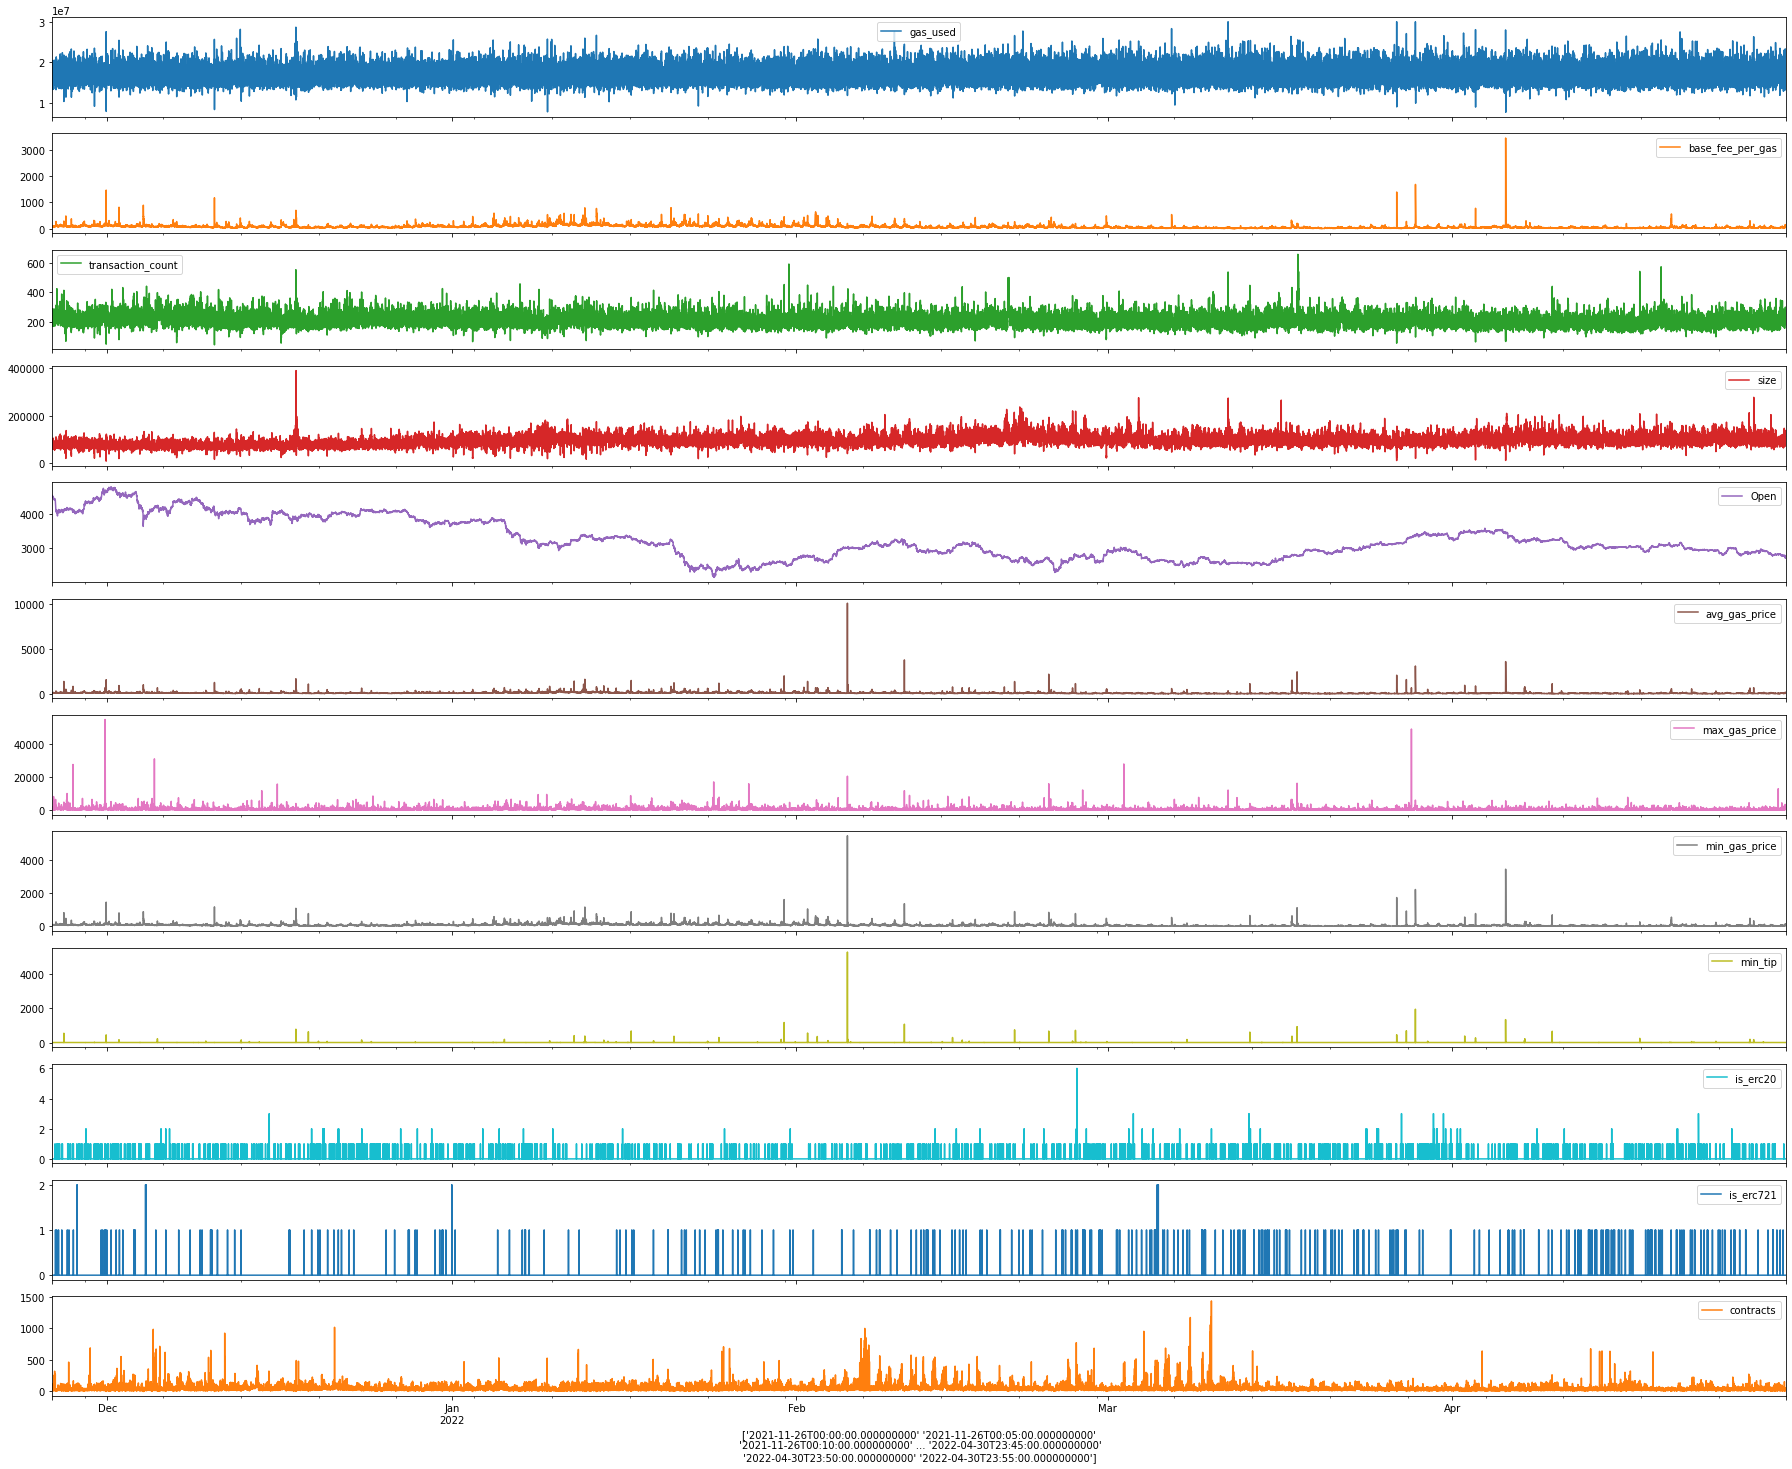

In [ ]:

data.plot(subplots=True, figsize=(25, 20))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


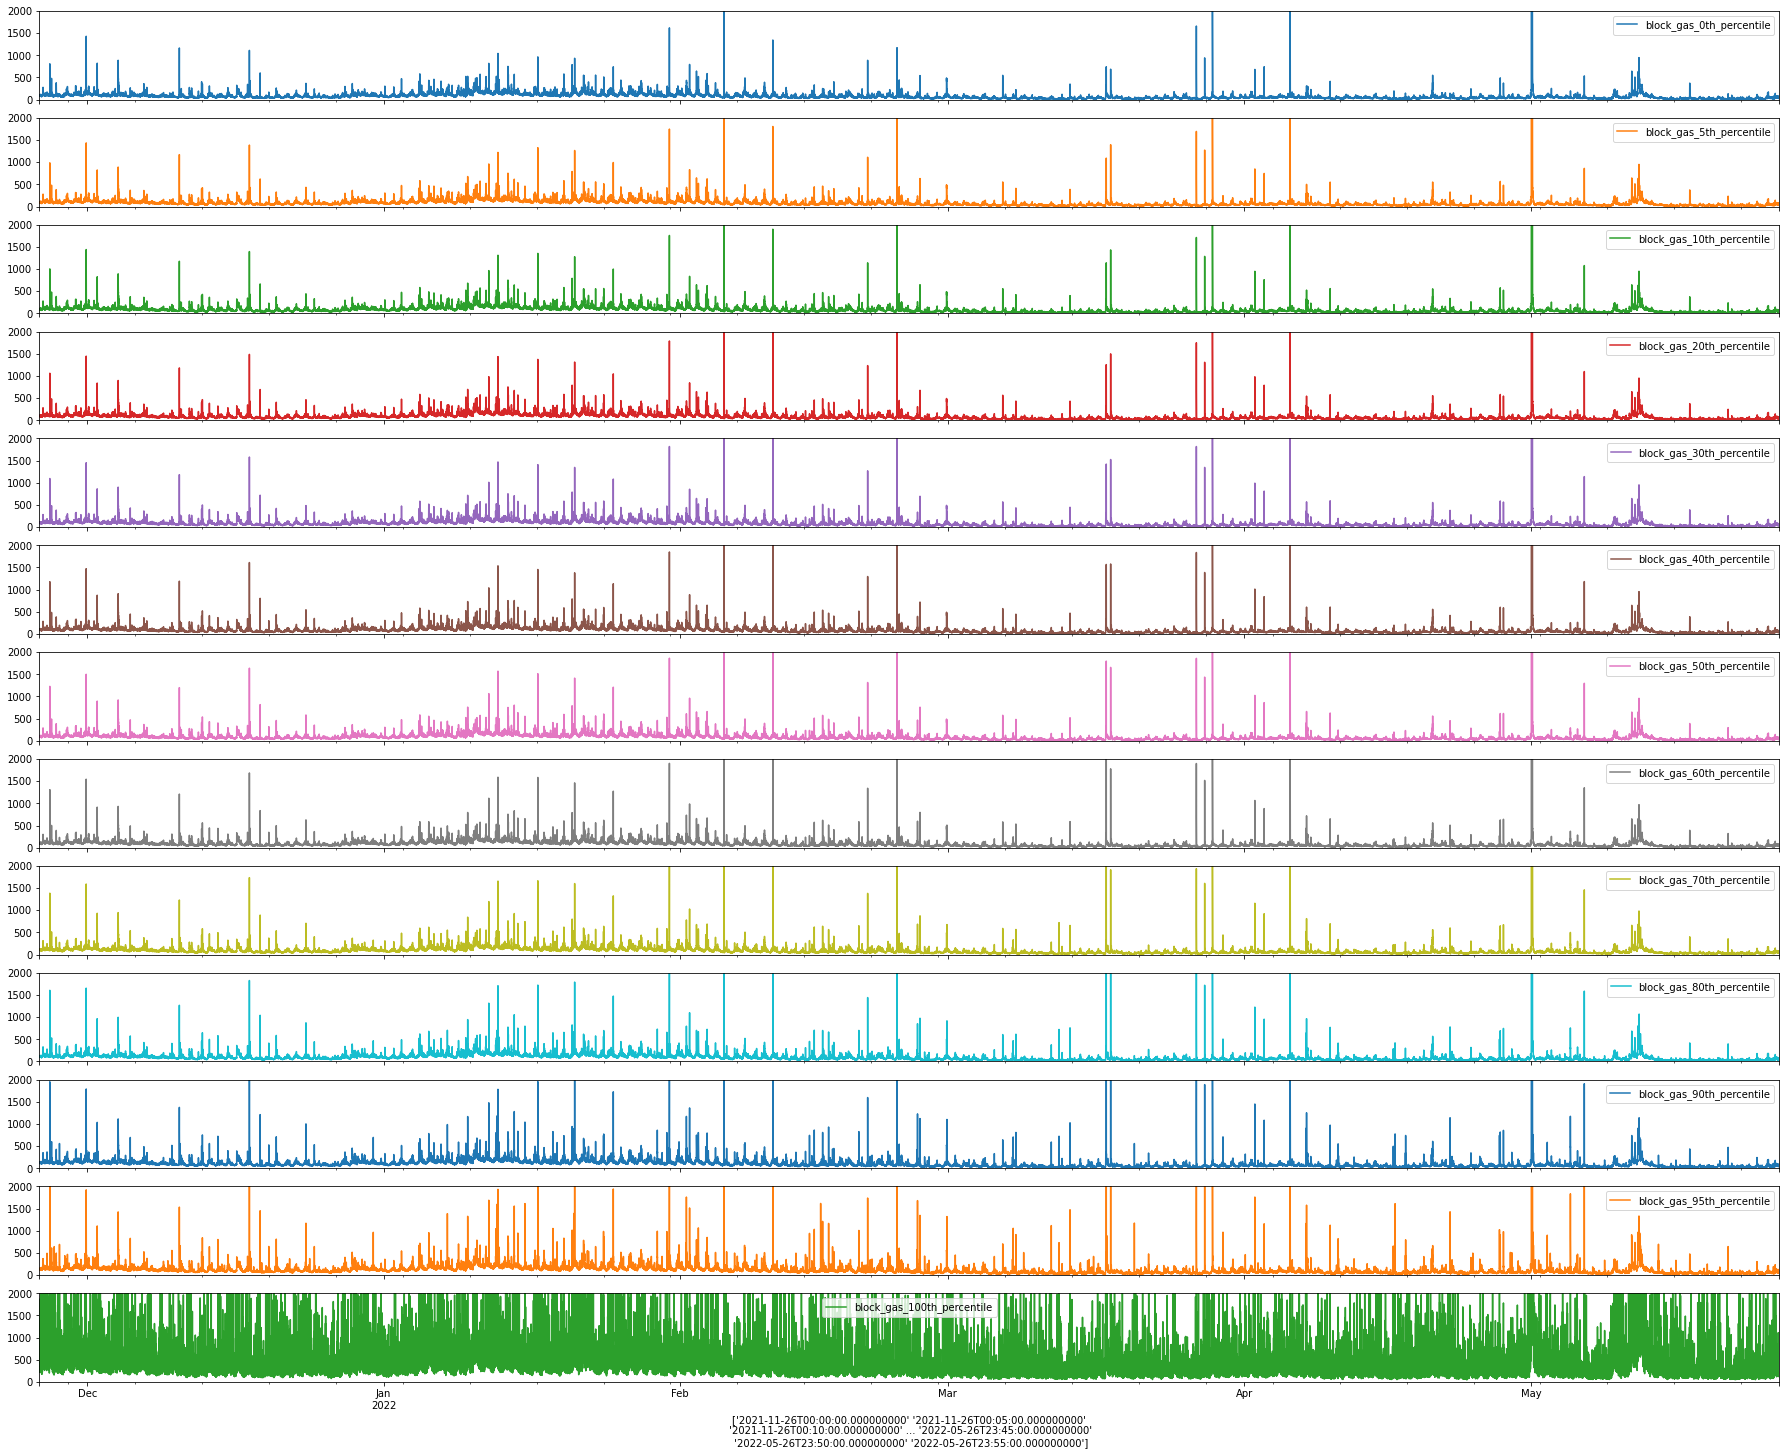

In [ ]:
df3.plot(subplots=True, figsize=(25, 20), sharey=True)
plt.tight_layout()
plt.xlabel(df3.index.values)
plt.ylim([0, 2000])
plt.show()

## Correlation Matrices

In [ ]:
def plot_corr(df,size=10):
#Plots a graphical correlation matrix for each pair of columns in the dataframe.

 
  

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, size=20)
    plt.yticks(range(len(corr.columns)), corr.columns, size=20)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=20) 
    
  
    


# Matrices

### All months, no percentiles

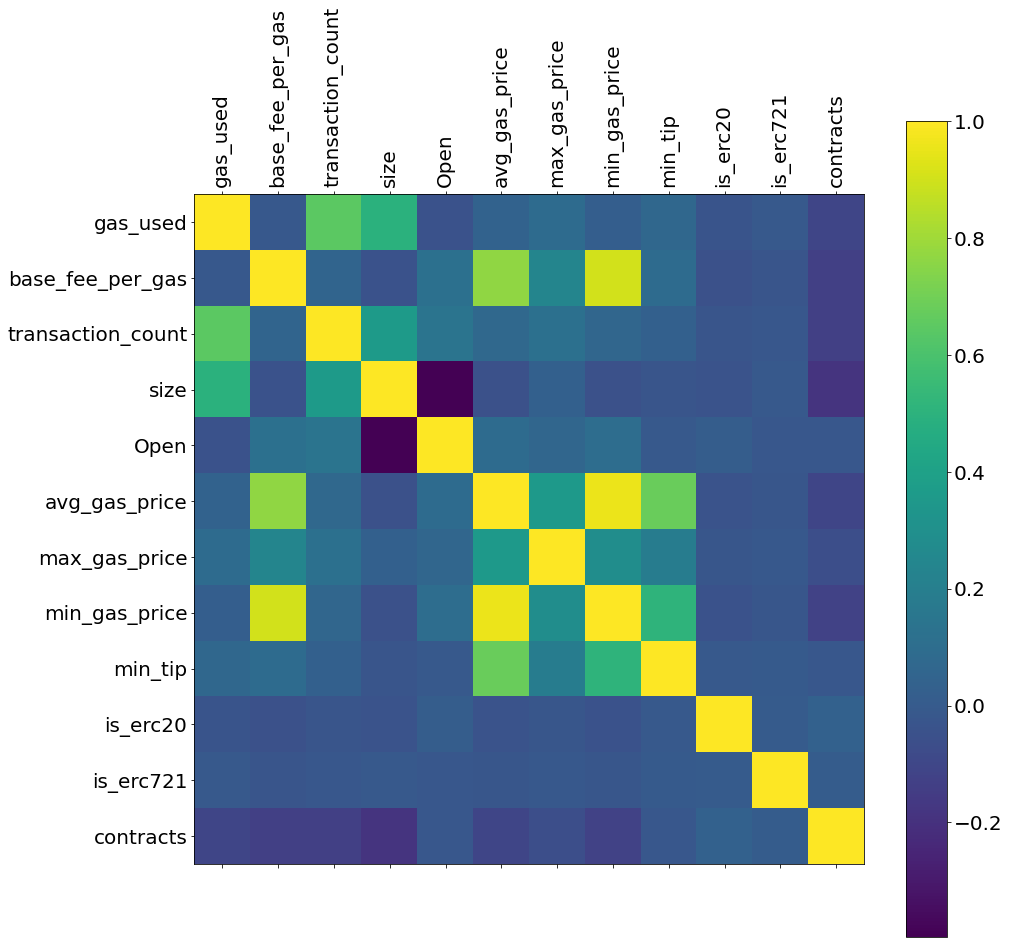

In [ ]:
plot_corr(data, size=15)

### With percentile data

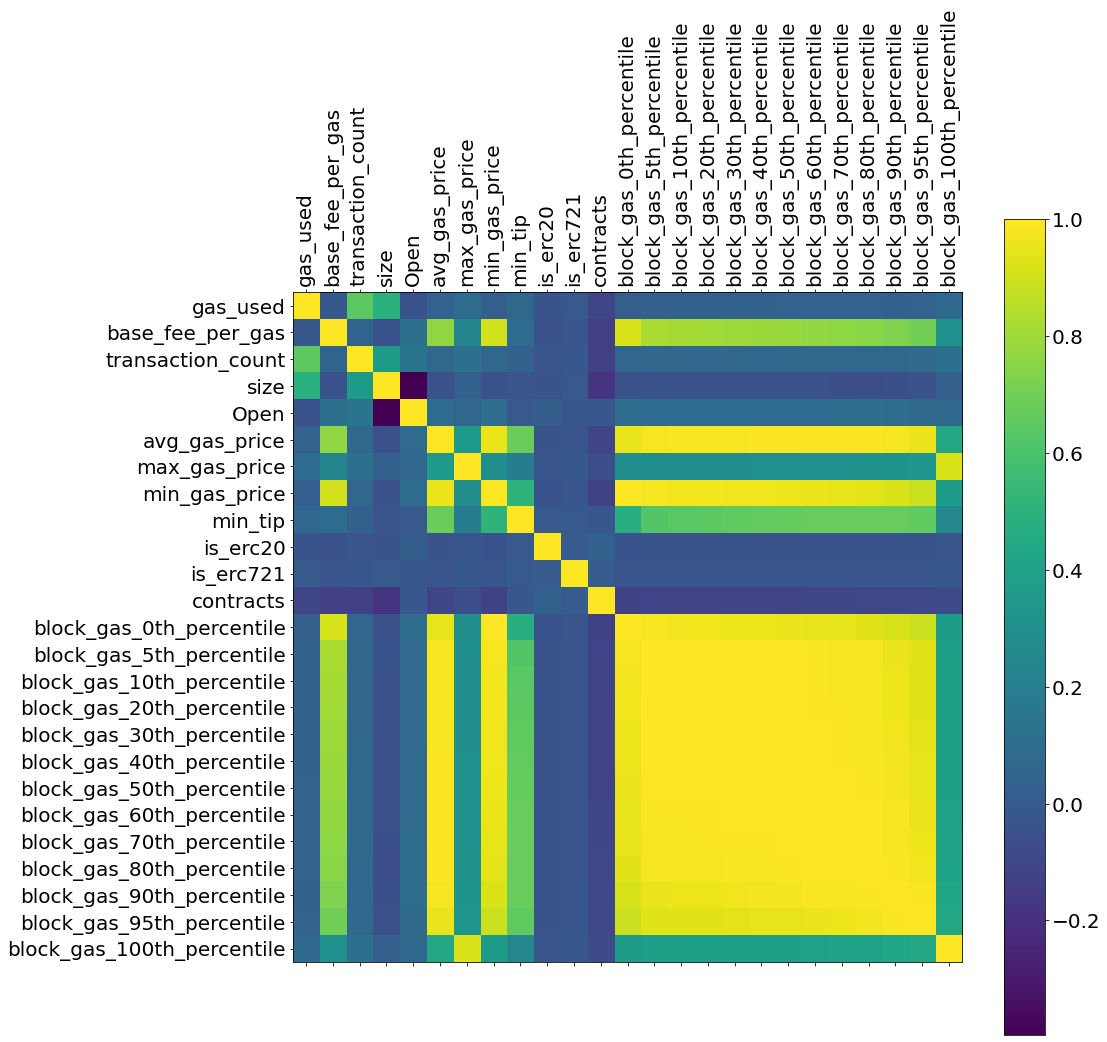

In [ ]:
plot_corr(data_all, size=15)

### Lets slice the data by month

In [ ]:
end_dates = ['2021-12-26 23:55:00', '2022-01-26 23:55:00', '2022-02-26 23:55:00', '2022-03-26 23:55:00', '2022-04-26 23:55:00'  ]
Start_dates = ['2021-11-26 00:00:00', '2021-12-26 00:00:00', '2022-01-26 23:55:00', '2022-02-26 23:55:00', '2022-03-26 23:55:00']

end_dates_bimonthly = ['2021-12-26 23:55:00', '2022-01-11 23:55:00', '2022-01-26 23:55:00', '2022-02-11 23:55:00', '2022-02-26 23:55:00','2022-03-11 23:55:00',  '2022-03-26 23:55:00', '2022-04-11 23:55:00','2022-04-26 23:55:00']
Start_dates_bimonthly = ['2021-11-26 00:00:00','2021-12-11 00:00:00', '2021-12-26 00:00:00','2022-01-11 23:55:00', '2022-01-26 23:55:00','2022-02-11 23:55:00', '2022-02-26 23:55:00','2022-03-11 23:55:00', '2022-03-26 23:55:00']

In [ ]:
end_dates = ['2021-12-26 23:55:00', '2022-01-26 23:55:00', '2022-02-26 23:55:00', '2022-03-26 23:55:00', '2022-04-26 23:55:00']
Start_dates = ['2021-11-26 00:00:00', '2021-12-26 00:00:00', '2022-01-26 23:55:00', '2022-02-26 23:55:00', '2022-03-26 23:55:00']
correlation_matrices = []

for i in [0, 1, 2, 3, 4]:
    start_date=Start_dates[i]
    end_date=end_dates[i]
    correlation_matrices.append(data[start_date:end_date].corr())


### Chaning correaltion matrix eigenvalues with month

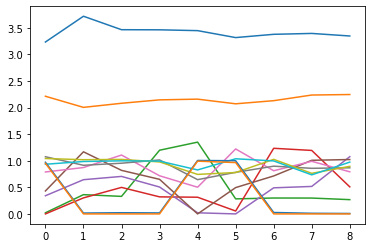

In [ ]:

correlation_matrices_bimonthly = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
    start_date=Start_dates_bimonthly[i]
    end_date=end_dates_bimonthly[i]
    correlation_matrices_bimonthly.append(data[start_date:end_date].corr())

eigvals = []
for matrix in correlation_matrices_bimonthly:
    w,v = np.linalg.eig(matrix)
    eigvals.append(w)

plt.plot(eigvals)        

In [ ]:
eigvals

[array([3.23173059e+00, 2.21199381e+00, 2.12436679e-02, 6.83838694e-07,
        3.41616713e-01, 4.31685297e-01, 7.88455753e-01, 1.07497591e+00,
        1.04166847e+00, 9.33732724e-01, 9.71619823e-01, 9.51276558e-01]),
 array([3.71618431e+00, 2.00303569e+00, 3.62047116e-01, 3.01426215e-01,
        6.43203510e-01, 1.16756608e+00, 8.71778115e-01, 9.14342127e-01,
        1.01905350e+00, 9.85254991e-01, 1.61079953e-02, 3.52552491e-07]),
 array([3.46318582e+00, 2.07990733e+00, 3.29576477e-01, 4.98468645e-01,
        7.05051216e-01, 8.18771286e-01, 1.10681876e+00, 9.53298980e-01,
        1.02446399e+00, 9.98132574e-01, 2.23234450e-02, 1.48139809e-06]),
 array([3.46112628e+00, 2.14423388e+00, 1.19730720e+00, 3.20572271e-01,
        5.05637878e-01, 6.50263221e-01, 7.17023939e-01, 1.01461673e+00,
        9.77584276e-01, 9.92902743e-01, 1.87308982e-02, 6.81309227e-07]),
 array([3.44570773e+00, 2.15764916e+00, 1.34957411e+00, 3.13973933e-01,
        2.08738743e-02, 1.76149468e-07, 5.01835414e-01, 

### Plot the monthly correlation matrices

<IPython.core.display.Javascript object>

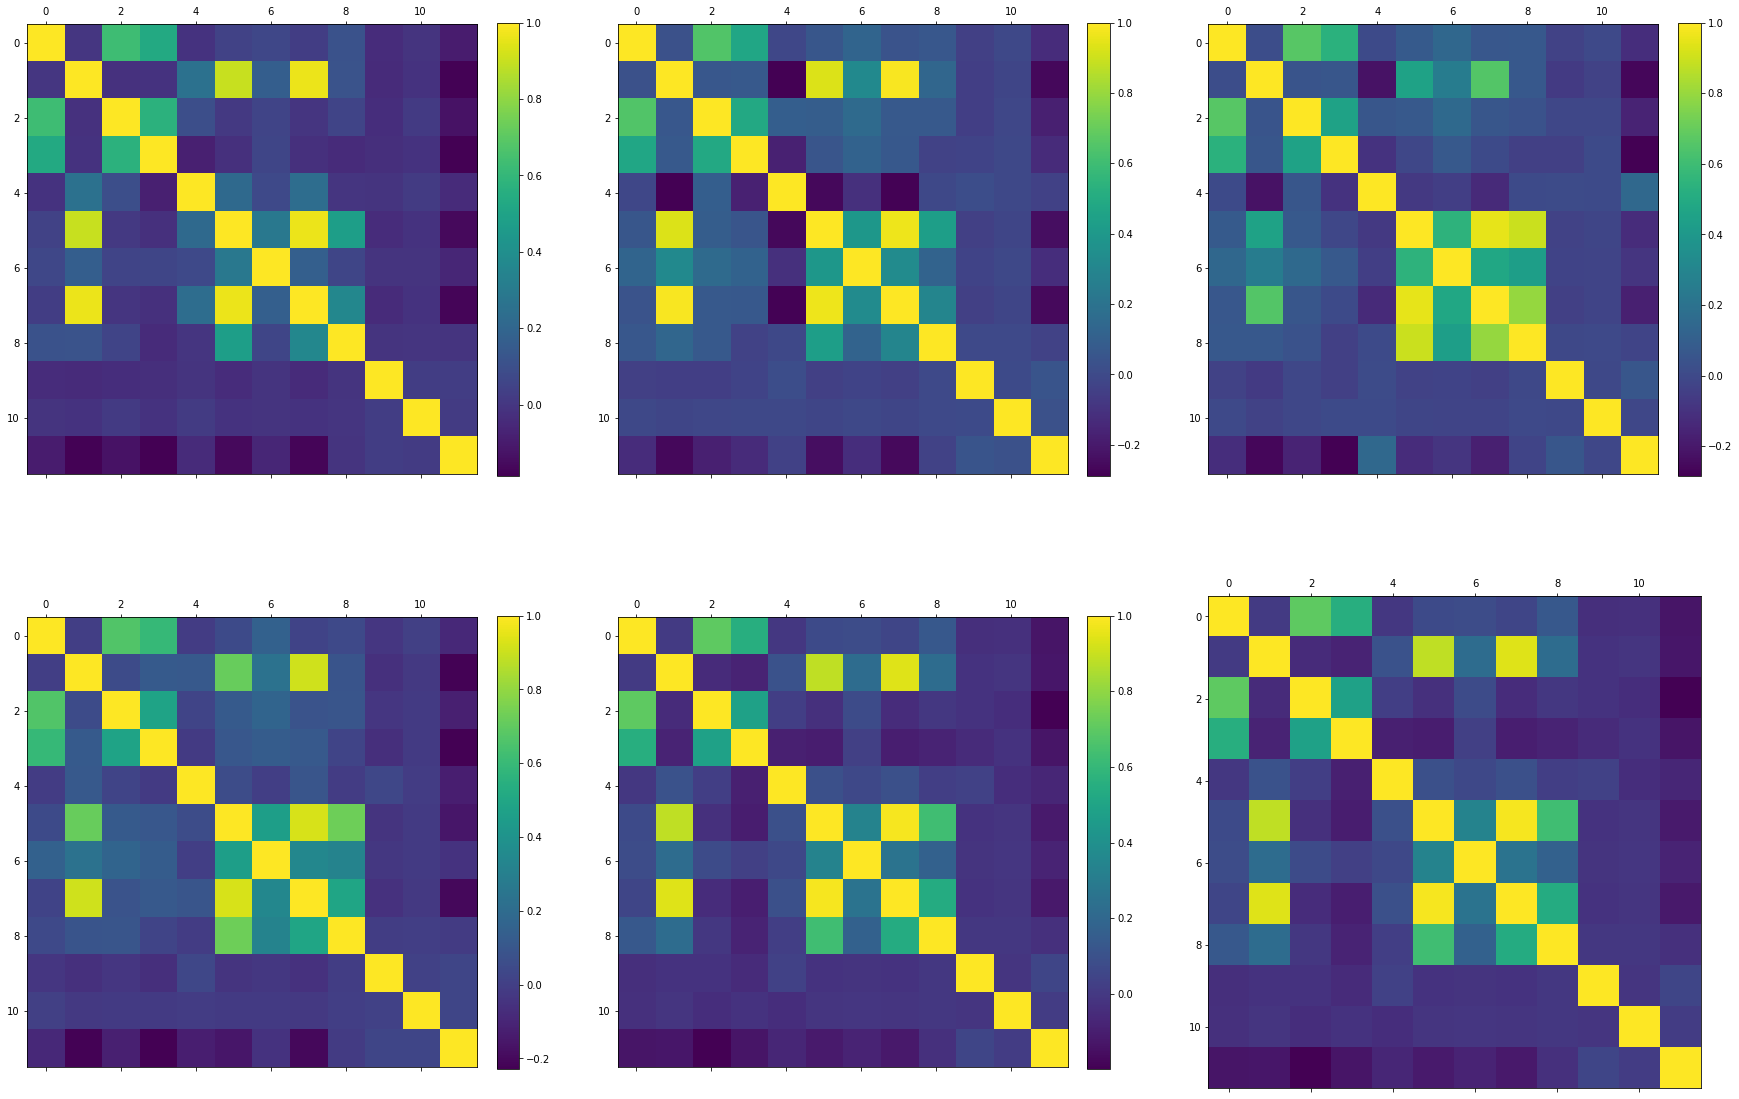

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))



im1=ax[0,0].matshow(correlation_matrices[0])
im2=ax[0,1].matshow(correlation_matrices[1])
im3=ax[0,2].matshow(correlation_matrices[2])
im4=ax[1,0].matshow(correlation_matrices[3])
im5=ax[1,1].matshow(correlation_matrices[4])
im6=ax[1,2].matshow(correlation_matrices[4])




fig.colorbar(im1, ax=ax[0,0],fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=ax[0,1],fraction=0.046, pad=0.04)
fig.colorbar(im3, ax=ax[0,2],fraction=0.046, pad=0.04)
fig.colorbar(im4, ax=ax[1,0],fraction=0.046, pad=0.04)
fig.colorbar(im5, ax=ax[1,1],fraction=0.046, pad=0.04)



# Lets graph the chaning correaltion values over various timescales

## Correlation slices

In [ ]:
def correlation_slices(variable, window, data):
  no_windows = int(round((len(data)/window), 0))
  slice_df = pd.DataFrame()
  index_list=[]
  for i in range(1, no_windows+1):
    slice_df = slice_df.append(data[(window*(i-1)):(window*i)].corr().loc[variable])
    index_list.append(data.index[(window*(i-1))])
  slice_df.index=index_list
  return slice_df  

## Daily correlation slices

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


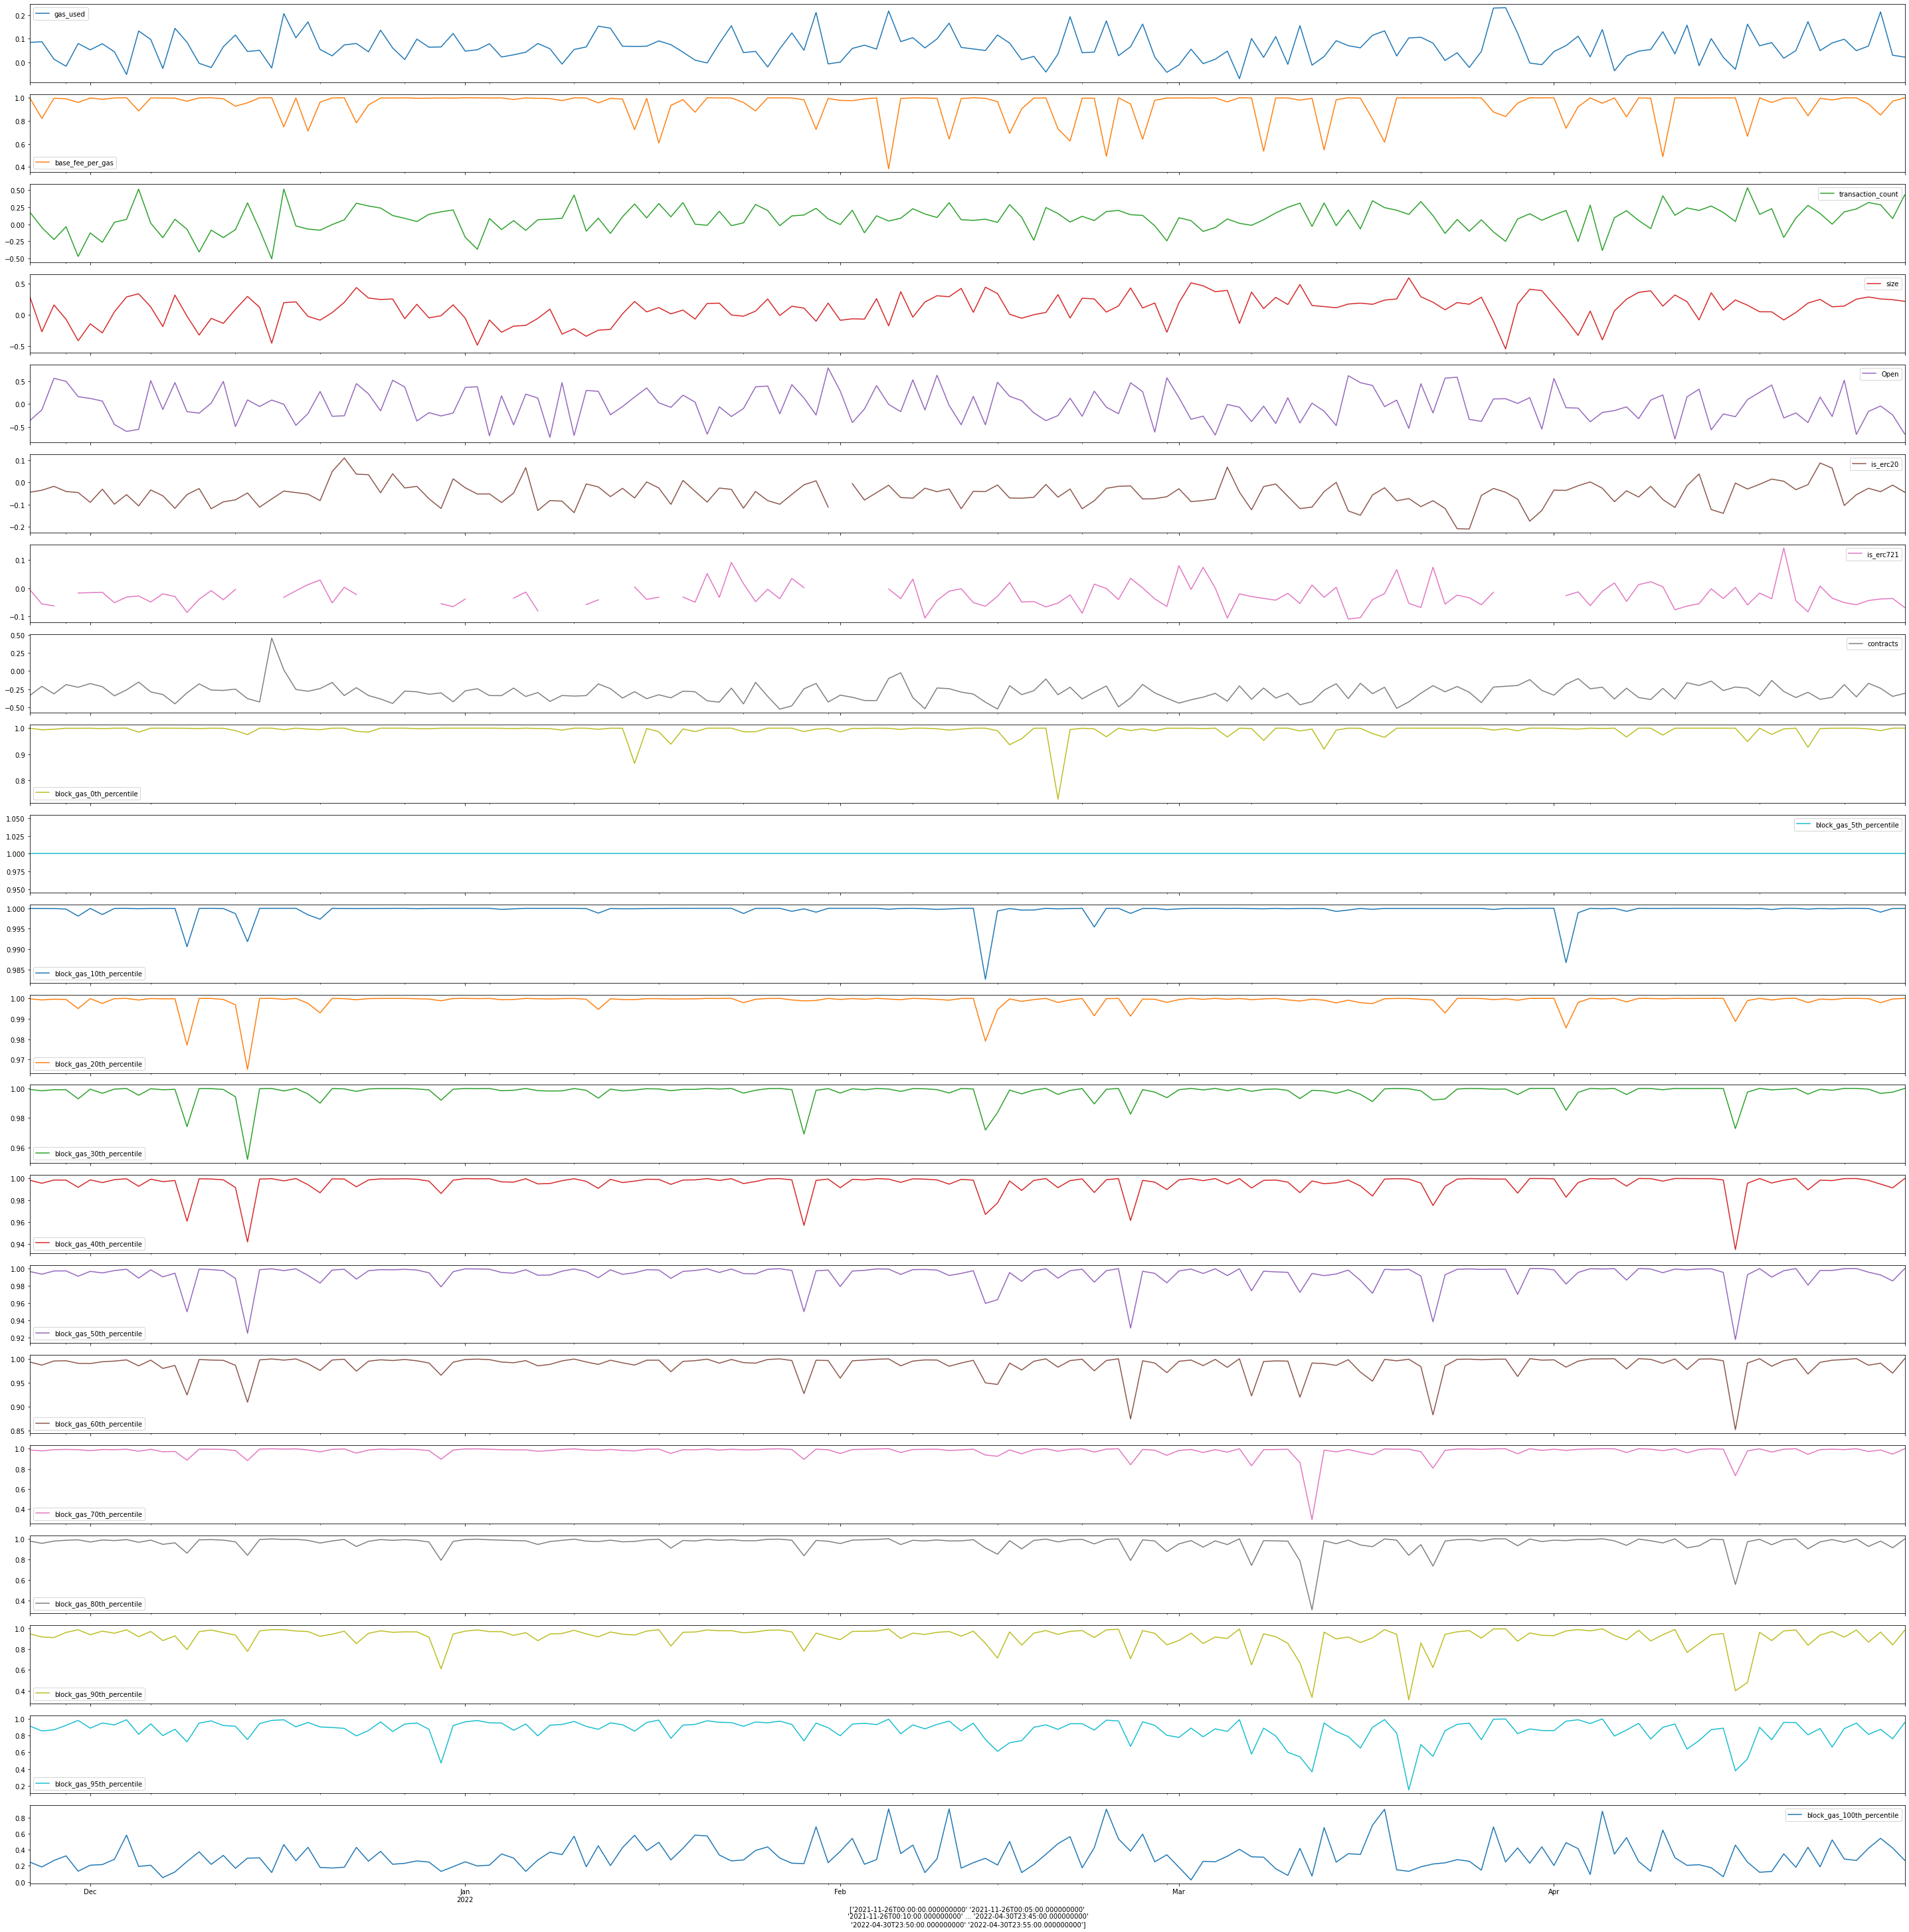

In [ ]:
## chaning correlation of each varaible with block gas 5th percentile, on a daily timescale

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

correlation_slices('block_gas_5th_percentile', 288, data_all.drop(['avg_gas_price', 'max_gas_price', 'min_gas_price', 'min_tip'], axis=1)).plot(subplots=True, figsize=(40, 40))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()



/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, "['2021-11-26T00:00:00.000000000' '2021-11-26T00:05:00.000000000'\n '2021-11-26T00:10:00.000000000' ... '2022-04-30T23:45:00.000000000'\n '2022-04-30T23:50:00.000000000' '2022-04-30T23:55:00.000000000']")

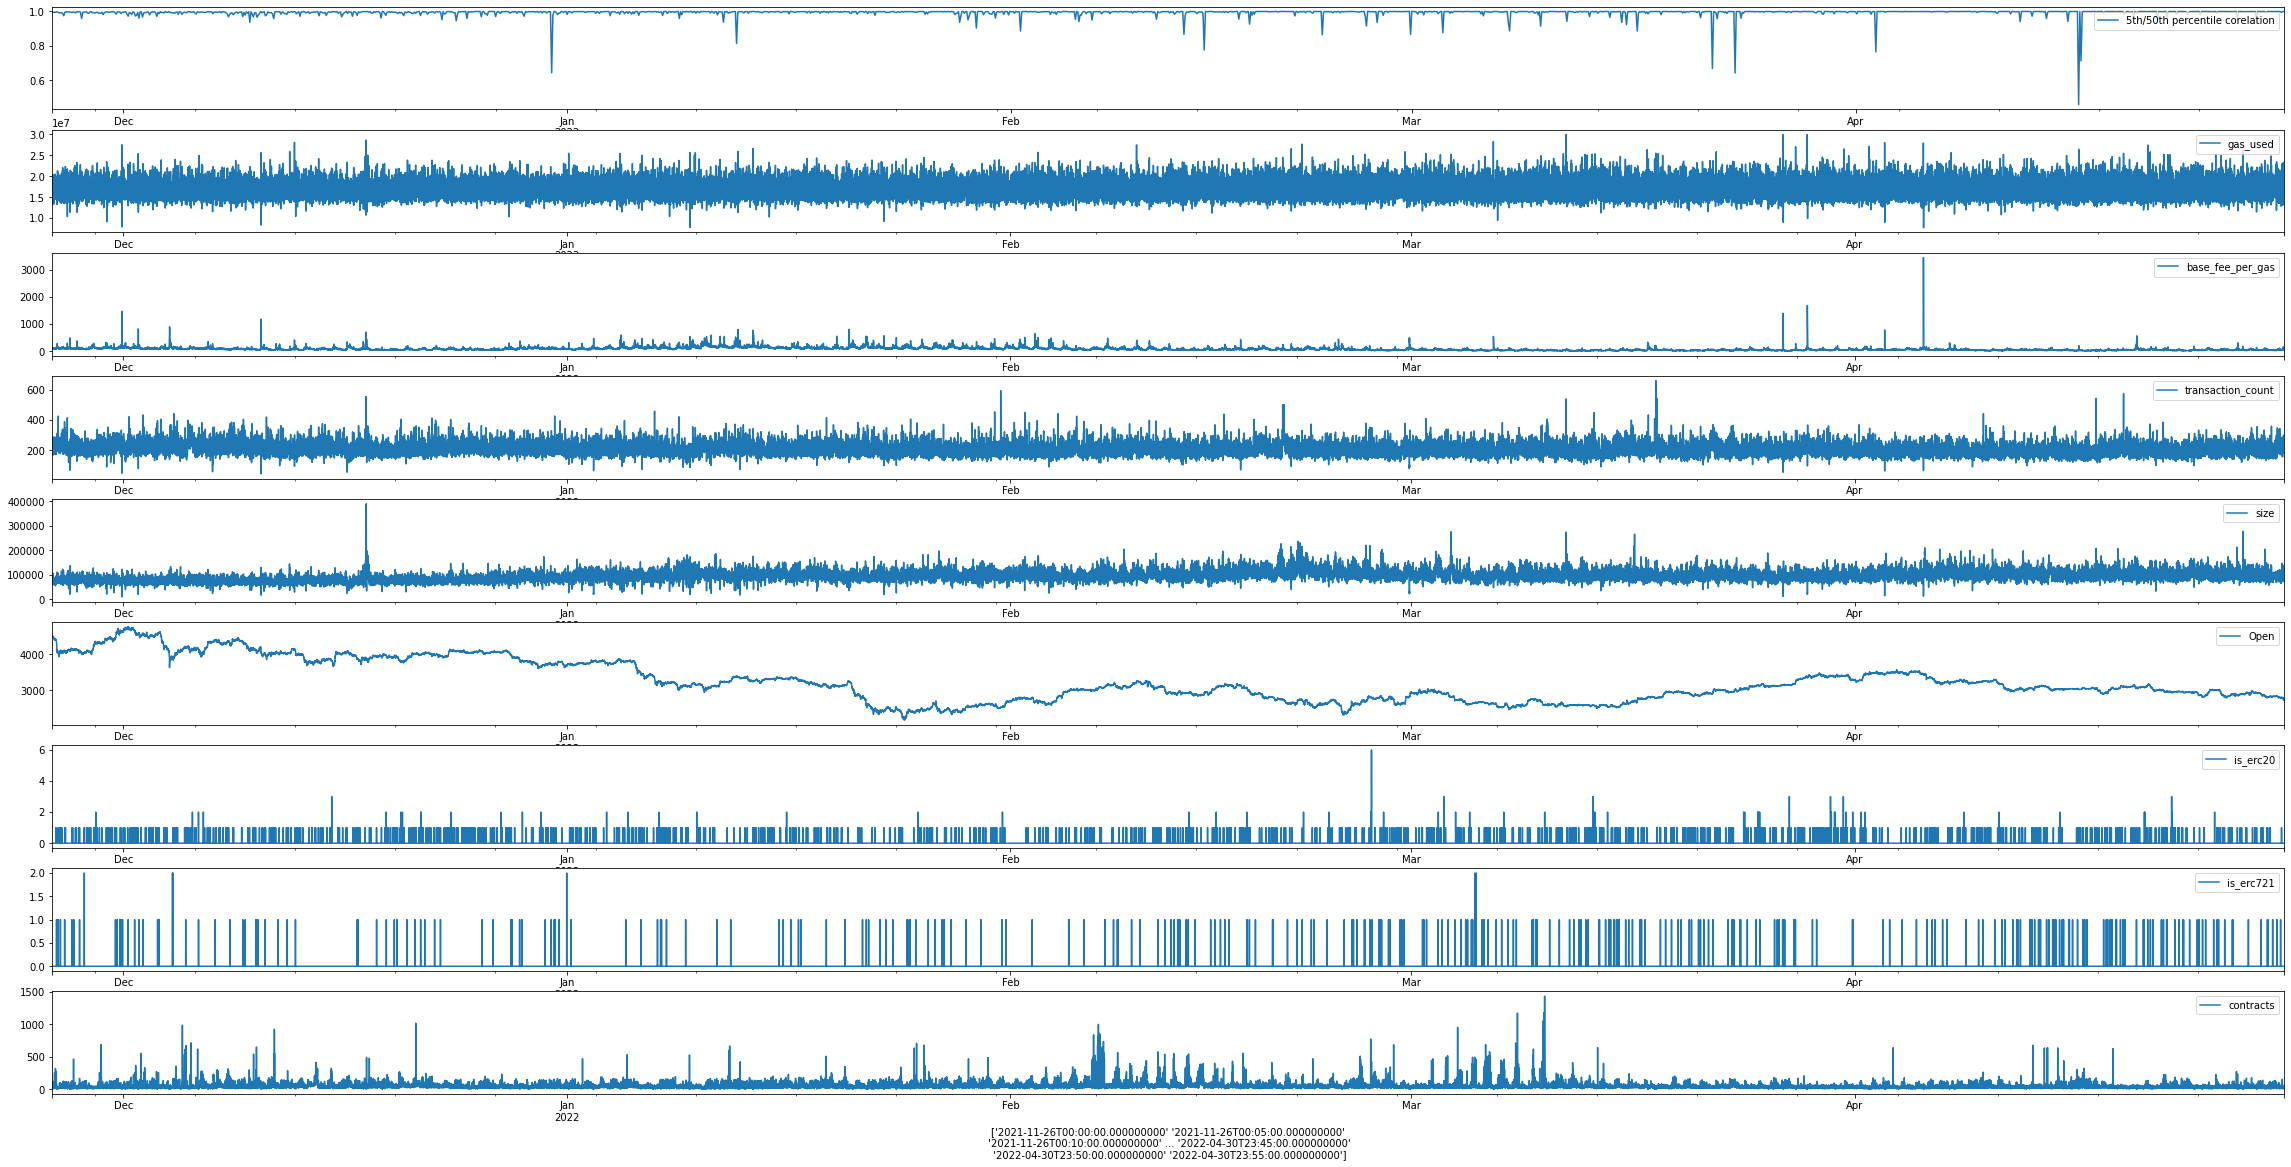

In [ ]:
# LEts look at the 5th/50th percentiel correaltion against the data, see if anything lines up
non_price_data = data.drop(['avg_gas_price', 'max_gas_price', 'min_gas_price', 'min_tip'], axis=1)
daily_slices_5th_percentile = correlation_slices(block_gas_50th_percentile, 288, data_all):

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(40, 20))

daily_slices_5th_percentile['block_gas_50th_percentile'].plot(ax=axes[0], label="5th/50th percentile corelation").legend(loc="upper right")
for column in non_price_data:
  non_price_data[column].plot(ax=axes[(non_price_data.columns.get_loc(column))+1], label=str(column)).legend(loc="upper right")
plt.xlabel(df.index.values)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


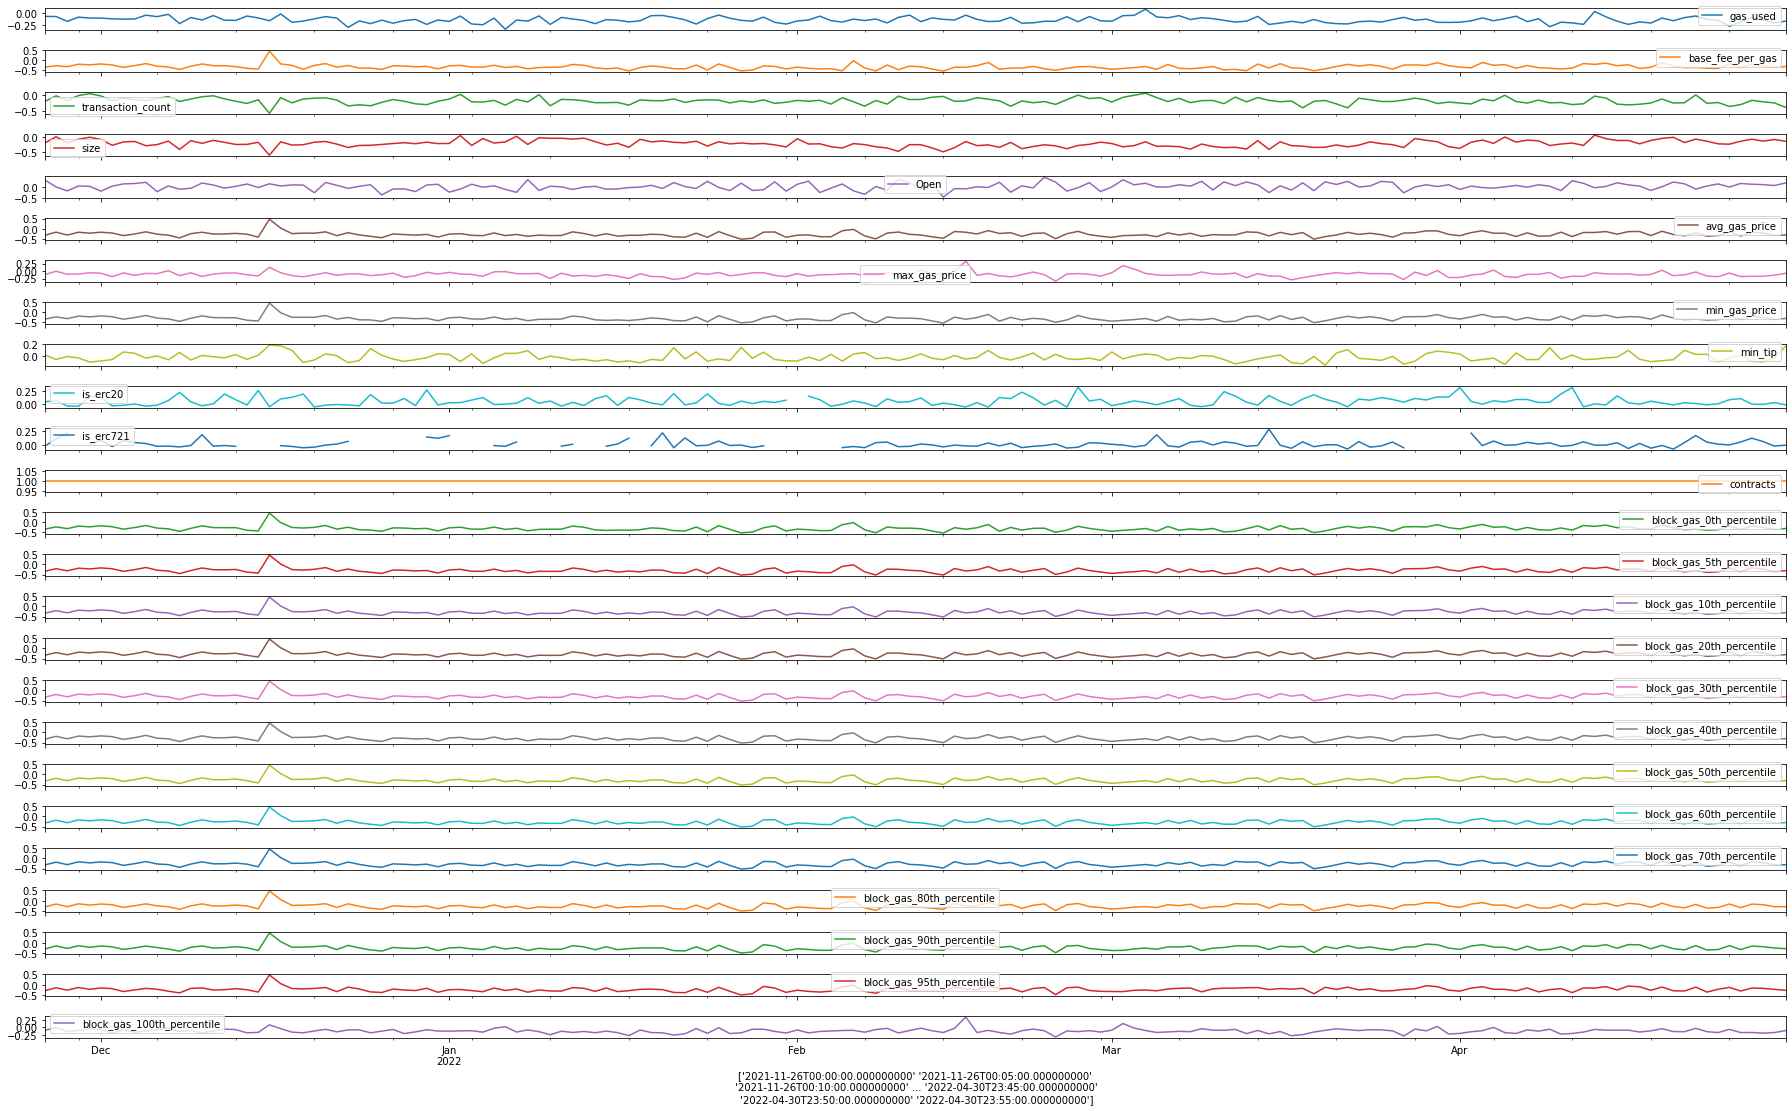

In [ ]:
# correlation with contract count on daily scale
correlation_slices('contracts', 288, data_all).plot(subplots=True, figsize=(25, 15))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


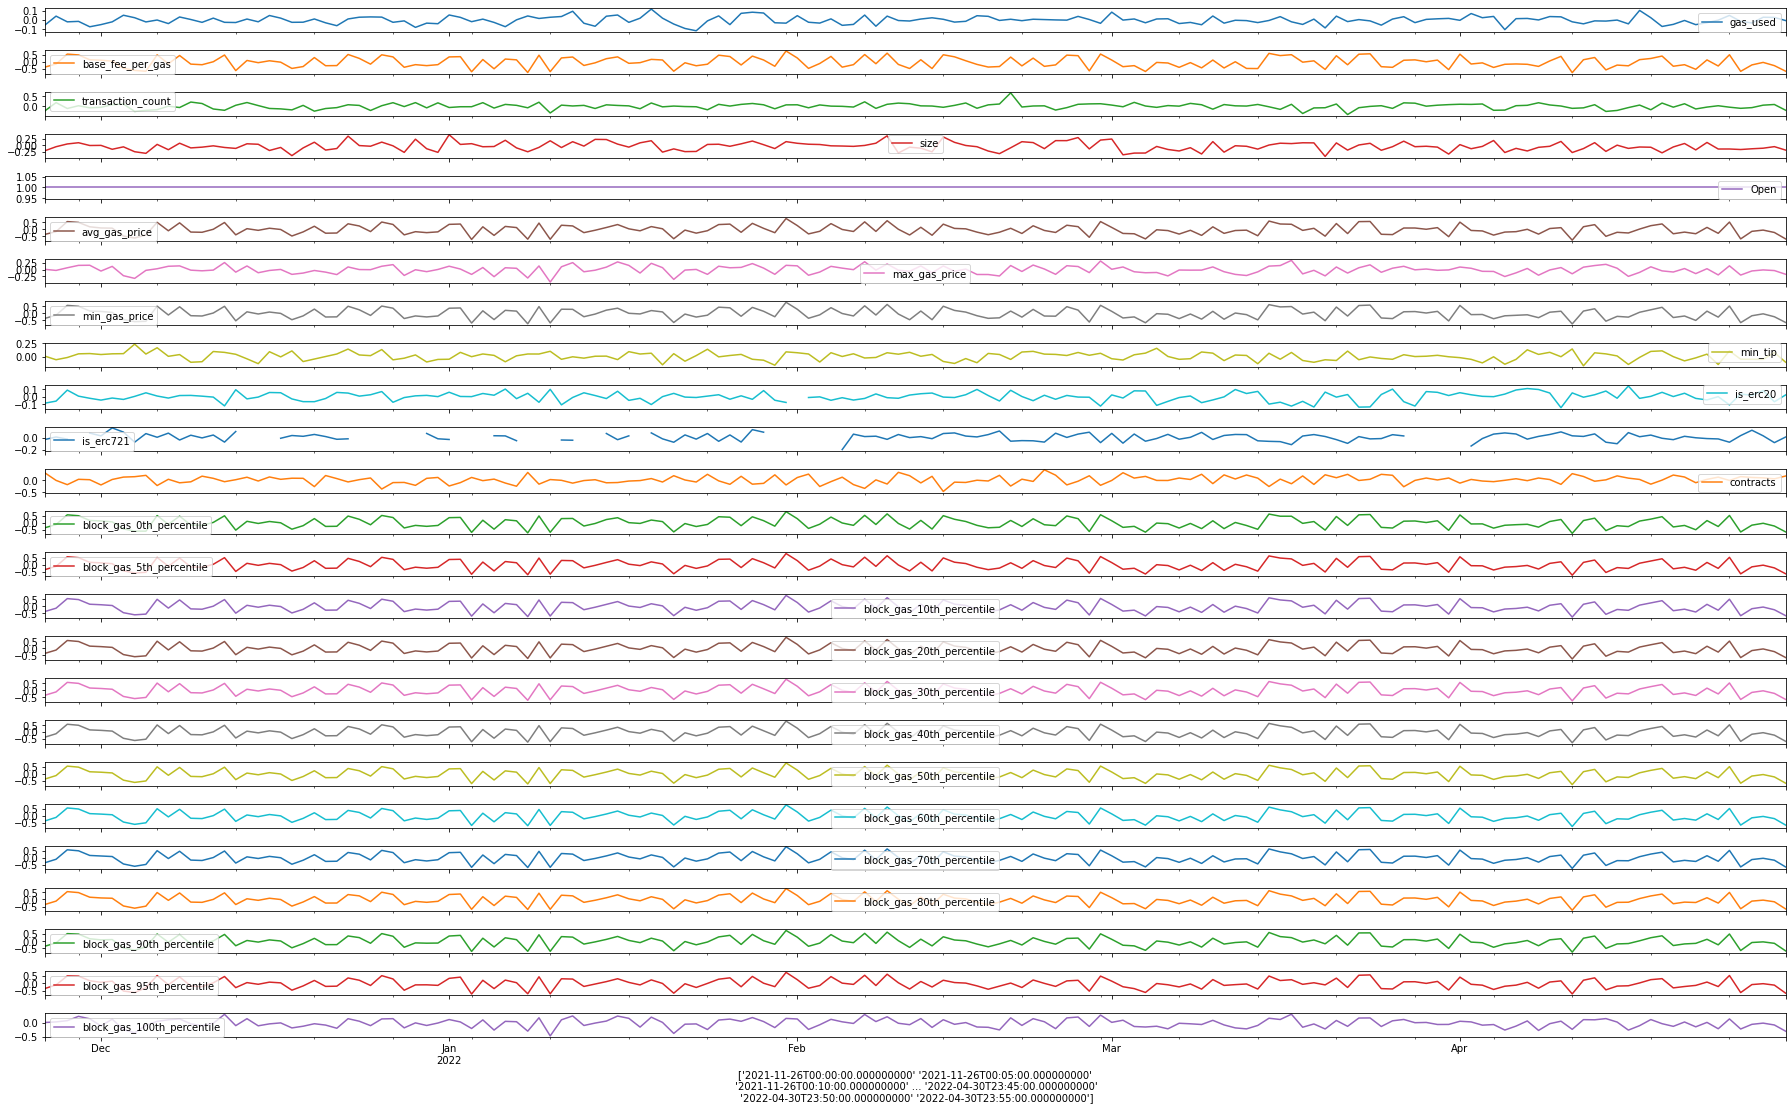

In [ ]:
# correaltionw ith ETH/USD price on daily scale
correlation_slices('Open', 288, data_all).plot(subplots=True, figsize=(25, 15))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

## Hourly Slices

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


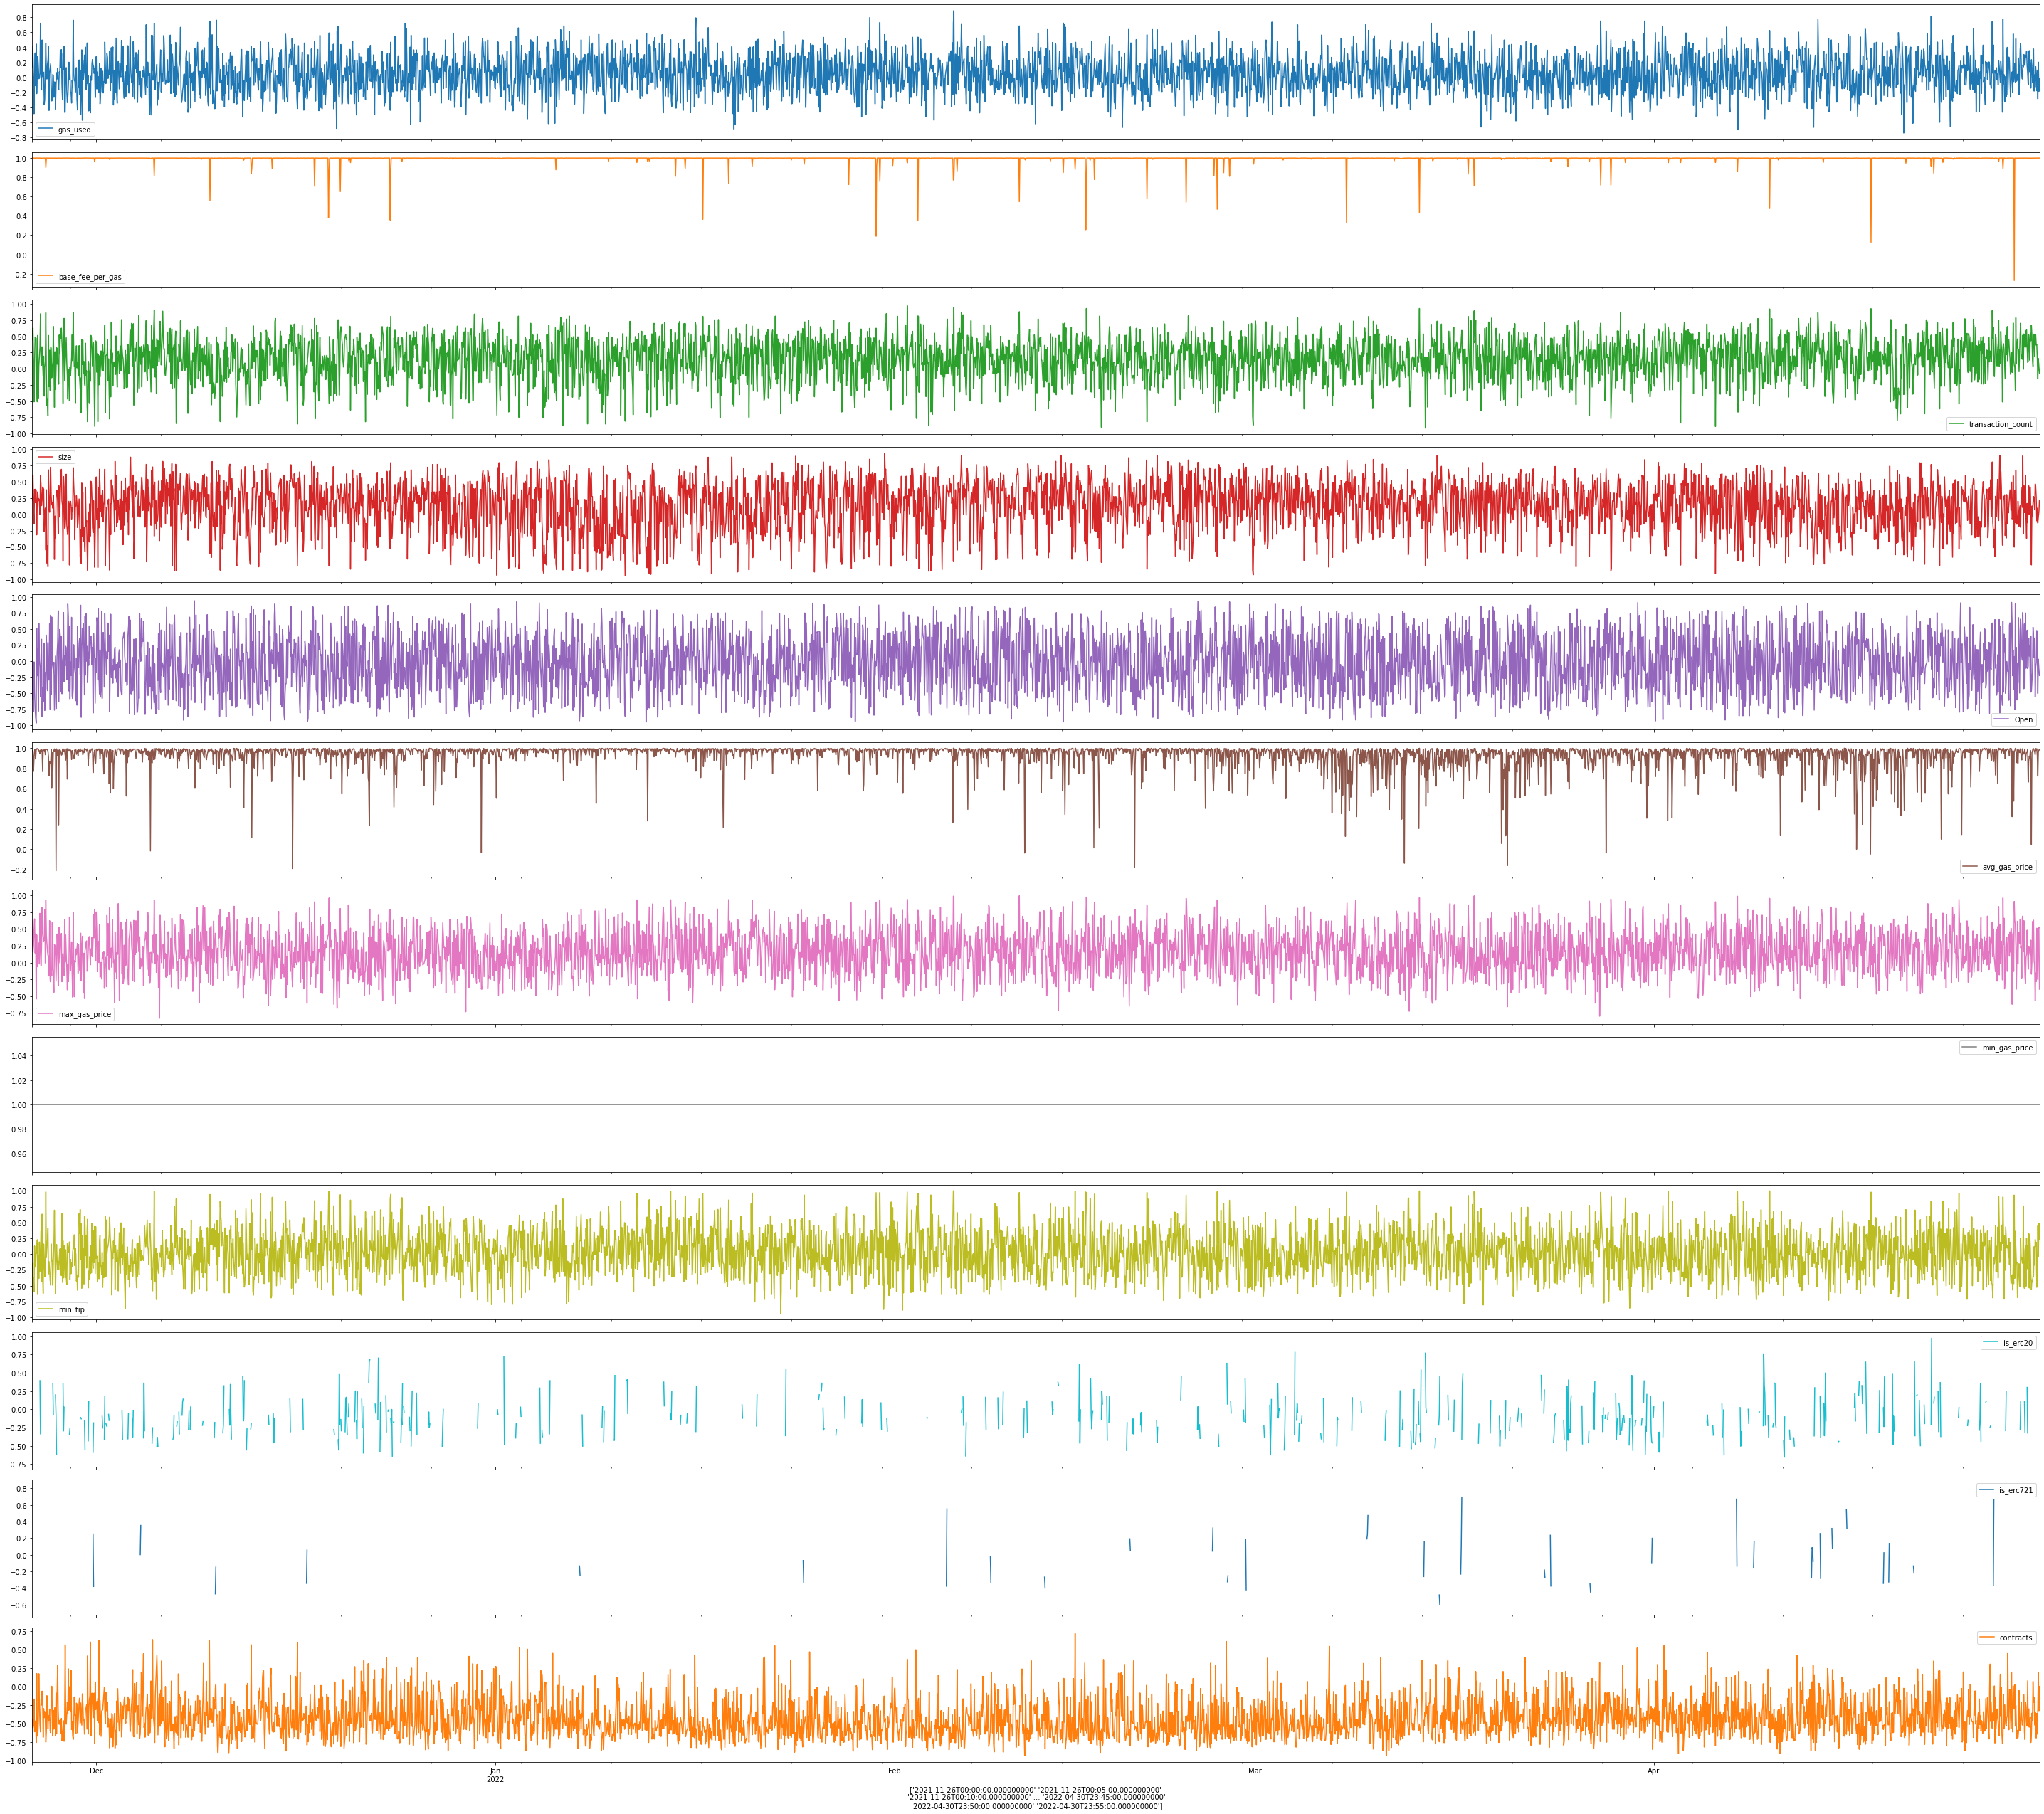

In [ ]:
correlation_slices('min_gas_price', 12, data).plot(subplots=True, figsize=(40, 35))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

## Weekly Correlation Slices

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


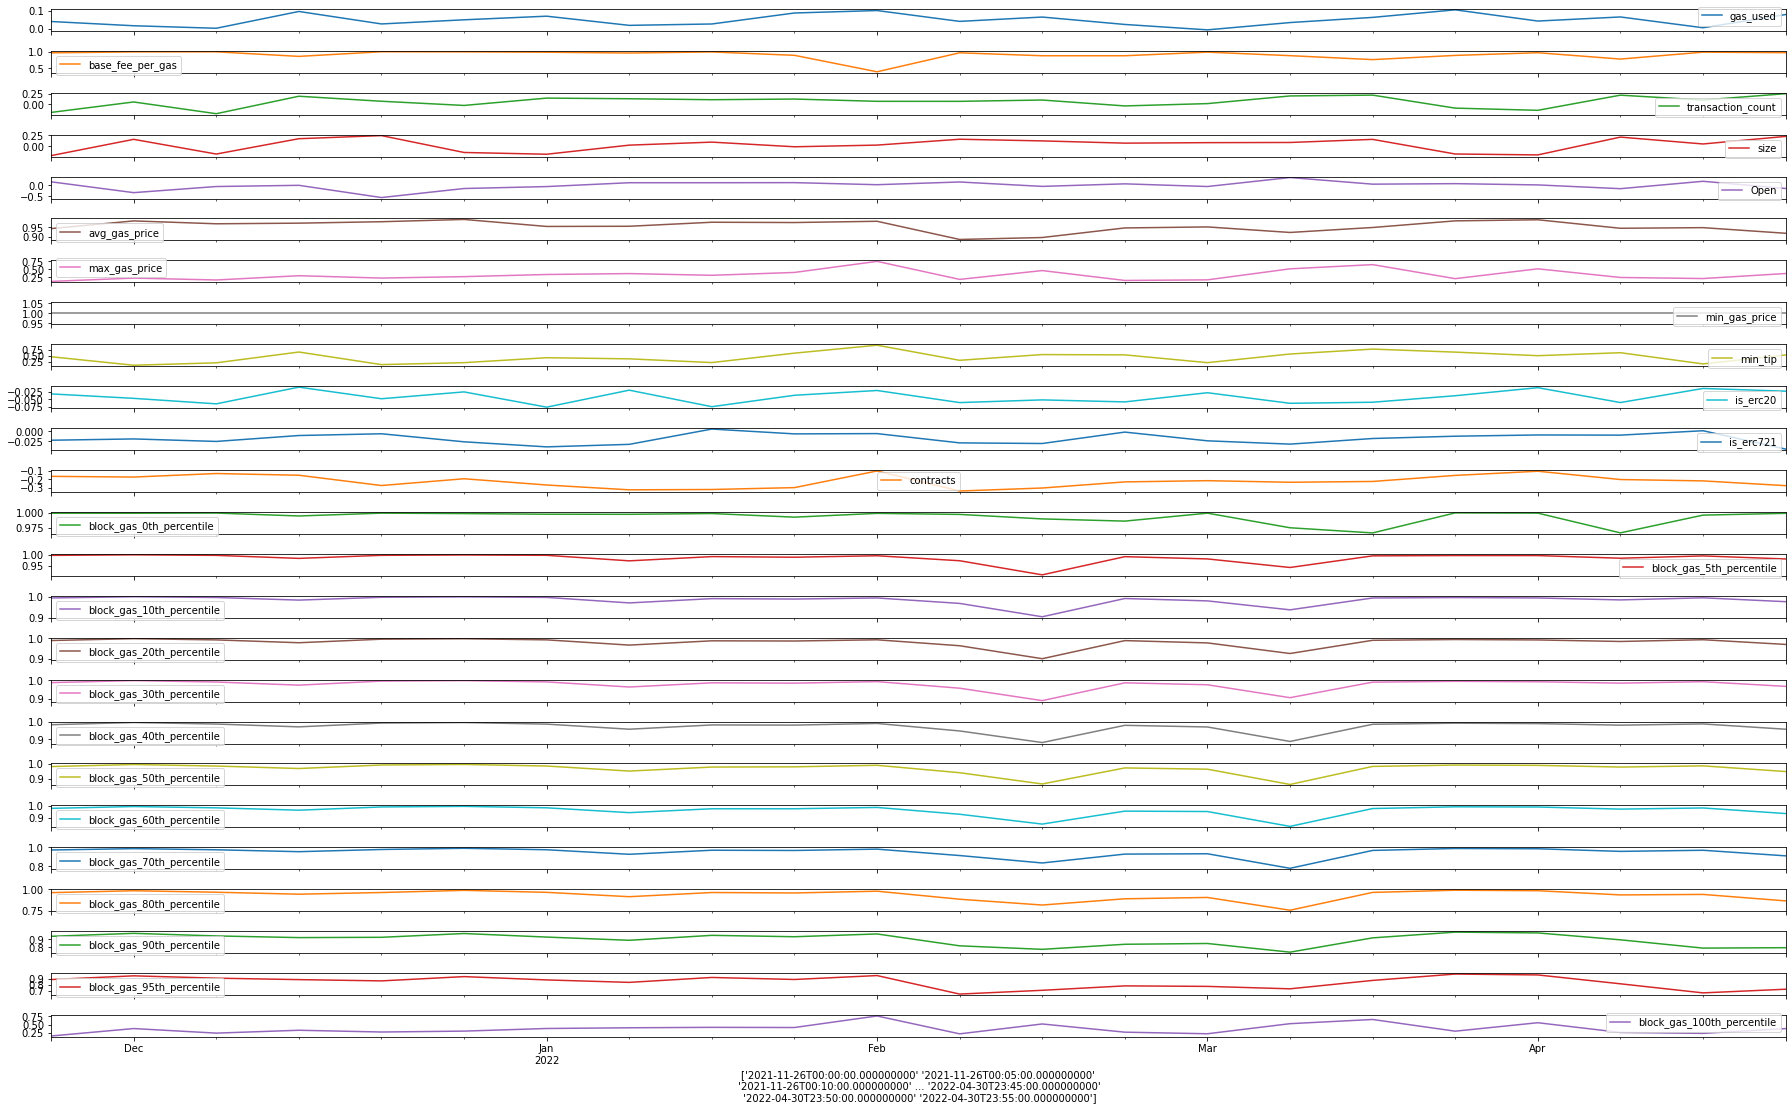

In [ ]:
correlation_slices('min_gas_price', 2016, data).plot(subplots=True, figsize=(25, 15))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


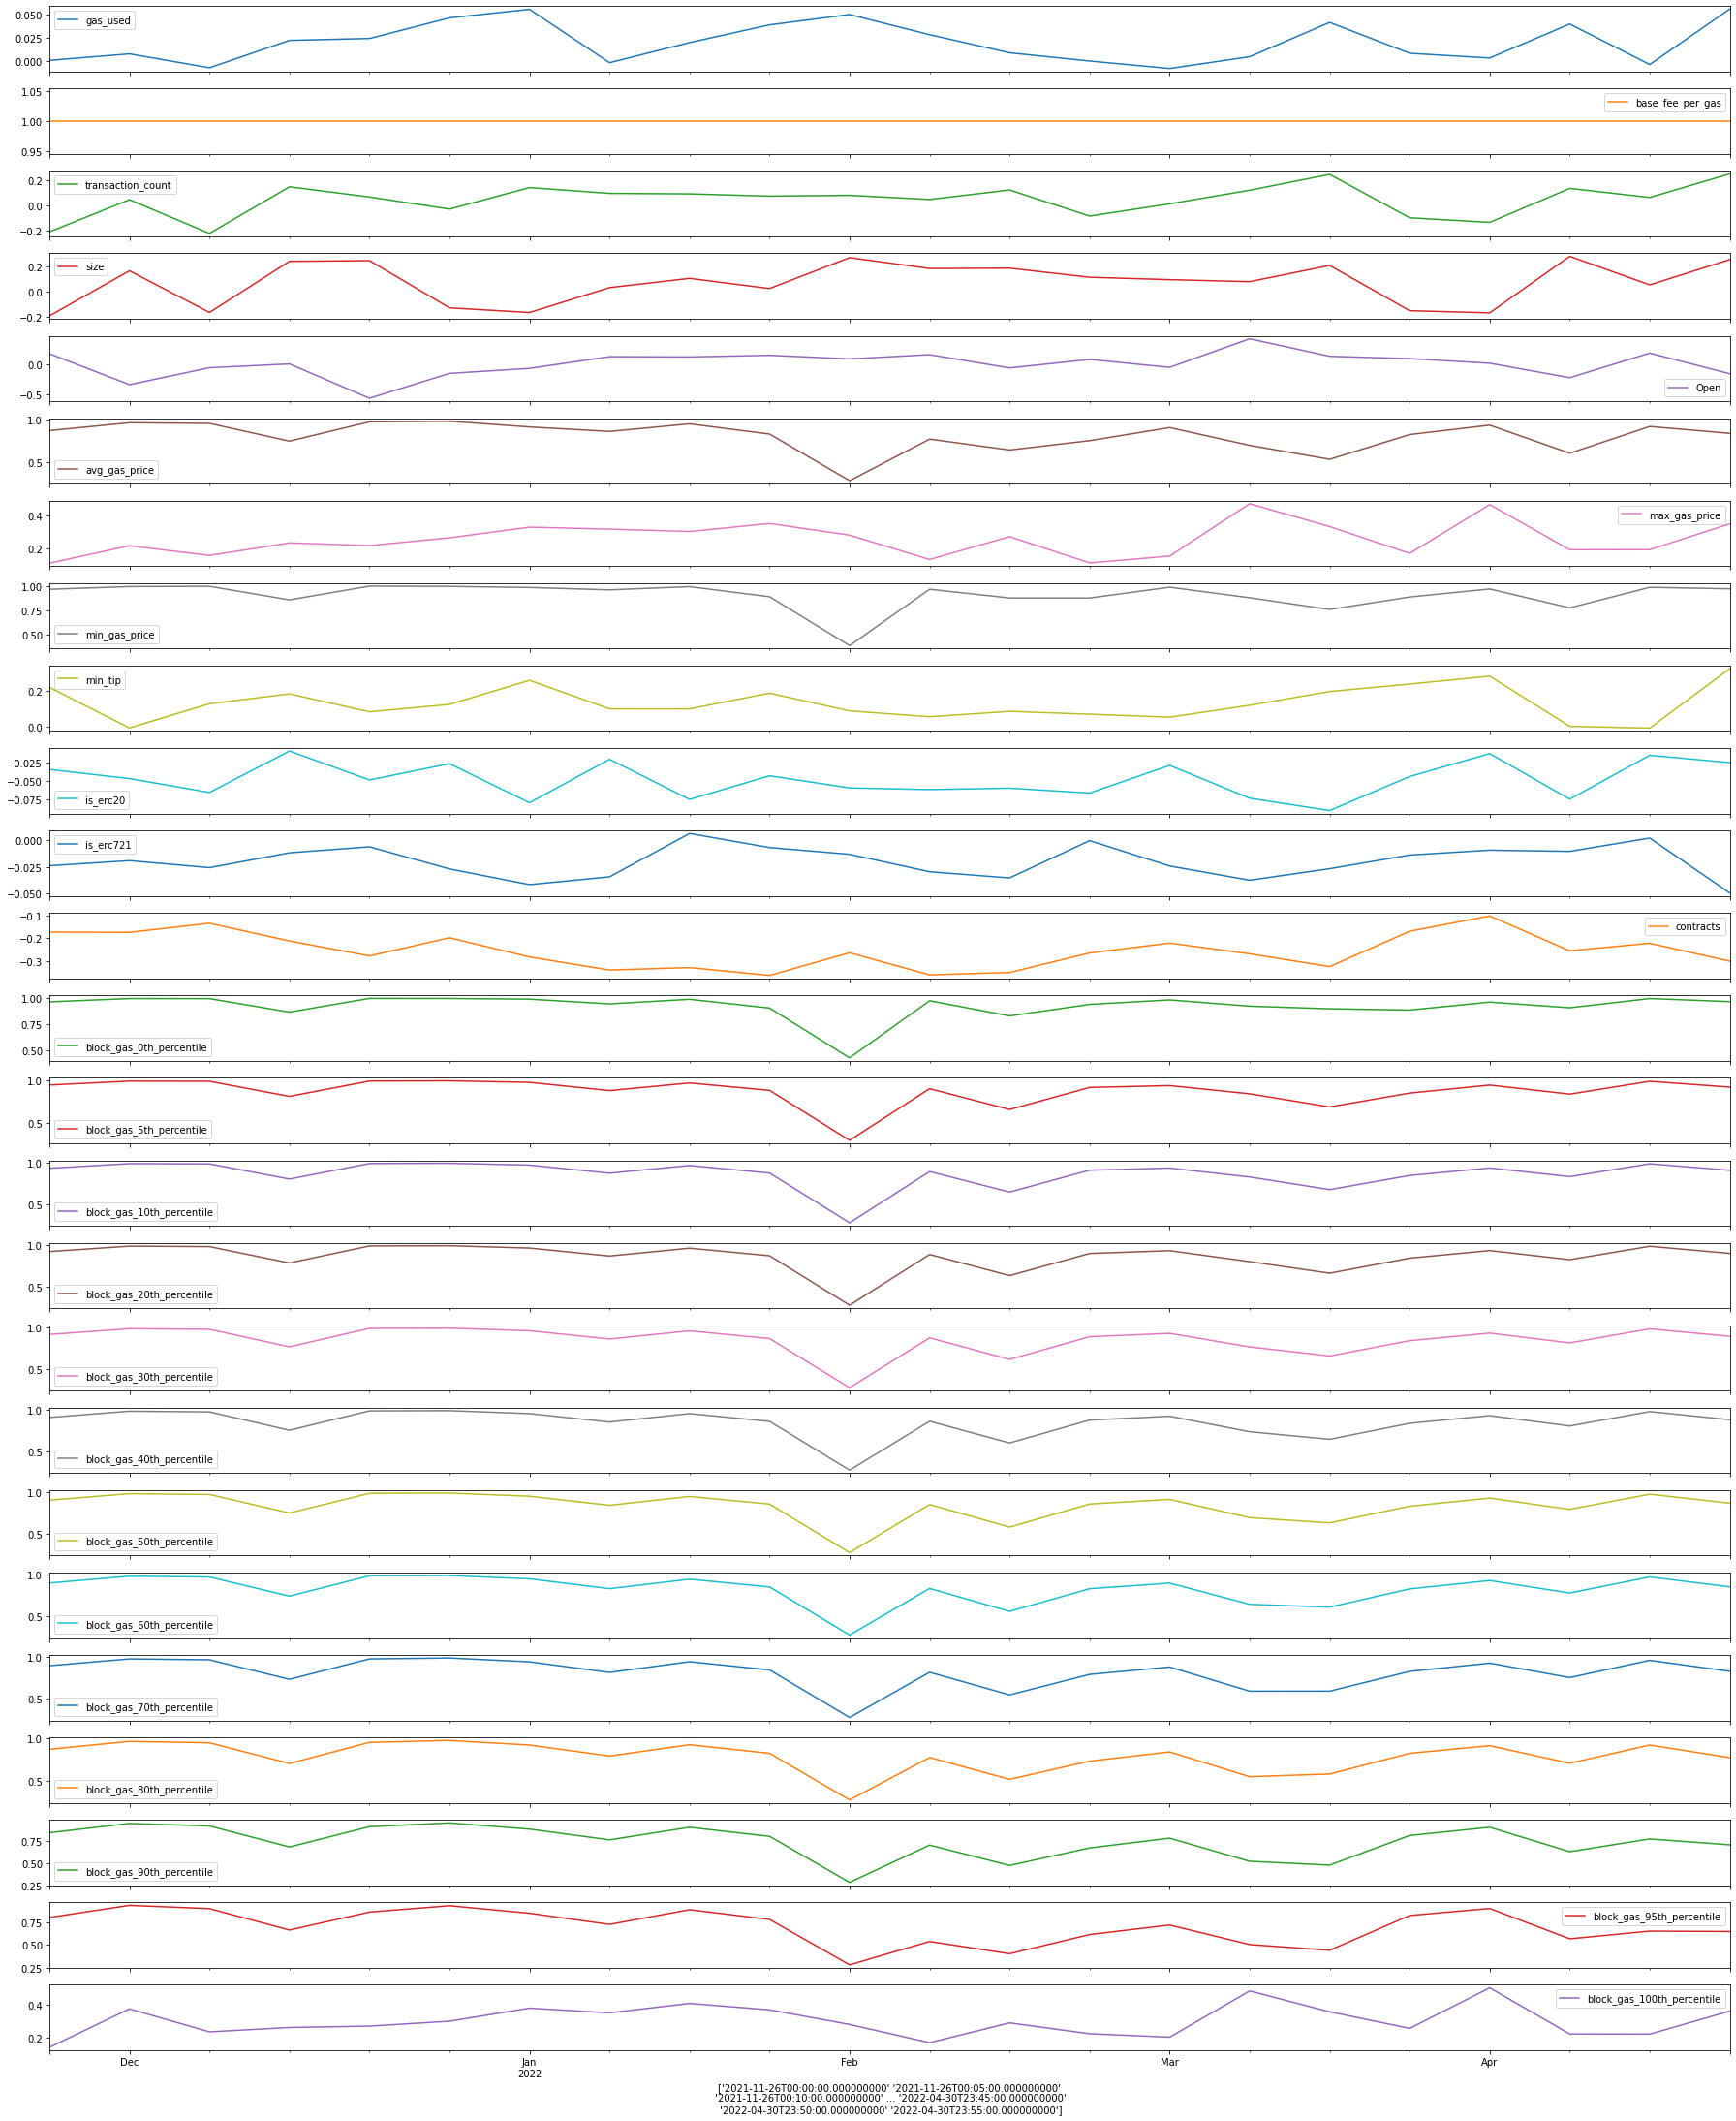

In [ ]:
correlation_slices('base_fee_per_gas', 2016, data).plot(subplots=True, figsize=(25, 30))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


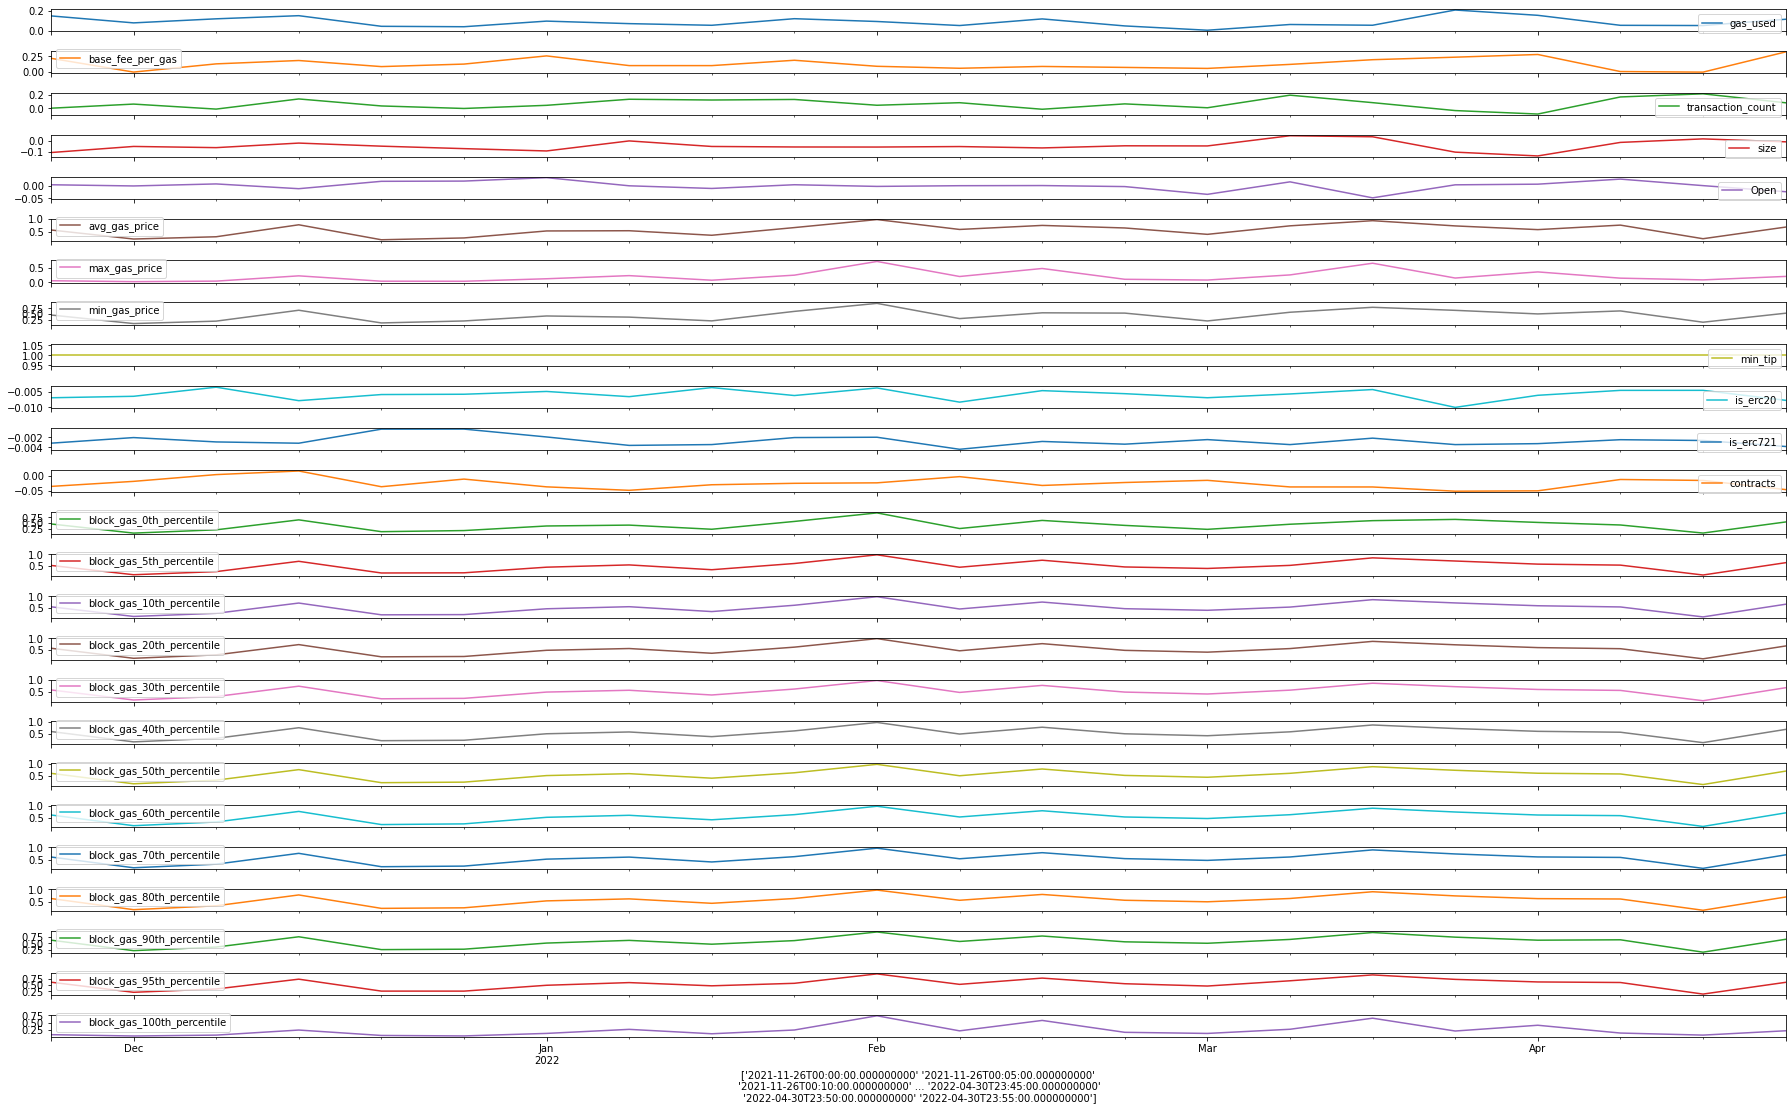

In [ ]:
correlation_slices('min_tip', 2016, data).plot(subplots=True, figsize=(25, 15))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()